In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import os

In [2]:
# importing google drive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Dissertation/time_series_60min_singleindex.csv")

In [4]:
df1

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       AT_load_actual_entsoe_transparency  \
0                                     NaN   
1                                  5946.0   
2                                  5726.0   
3                                  5347.0   
4                                  5249.0   
...                                   ...   
50396                              6661.0   
50397                              6336.0   
50398                              5932.0   
50399                              5628.0   
50400                              5395.0   

       AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
0                                       NaN                 NaN   
1                                    6701.0                35.0   
2                                    6593.0                45.0   
3                                    6482.0                41.0   
4                                    6454.0                38.0   
...                                     ...                 ...   
50396                                6656.0                 NaN   
50397                                6310.0                 NaN   
50398                                5813.0                 NaN   
50399                                5424.0                 NaN   
50400                                5204.0                 NaN   

       AT_solar_generation_actual  AT_wind_onshore_generation_actual  \
0                             NaN                                NaN   
1                             NaN                               69.0   
2                             NaN                               64.0   
3                             NaN                               65.0   
4                             NaN                               64.0   
...                           ...                                ...   
50396                         NaN                             1847.0   
50397                         NaN                             1723.0   
50398                         NaN                             1771.0   
50399                         NaN                             1779.0   
50400                         NaN                             1661.0   

       BE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                  9484.0   
2                                  9152.0   
3                                  8799.0   
4                                  8567.0   
...                                   ...   
50396                              9402.0   
50397                              9219.0   
50398                              8763.0   
50399                              8131.0   
50400                              7837.0   

       BE_load_forecast_entsoe_transparency  BE_solar_generation_actual  ...  \
0                                       NaN                         NaN  ...   
1                                    9897.0                         NaN  ...   
2                                    9521.0                         NaN  ...   
3                                    9135.0                         NaN  ...   
4                                    8909.0                         NaN  ...   
...                                     ...                         ...  ...   
50396            

In [5]:
df2 =pd.read_csv('/content/drive/MyDrive/Dissertation/weather_data_all_new.csv')

In [6]:
df2

utc_timestamp  AT_temperature  AT_radiation_direct_horizontal  \
0       1980-01-01T00:00:00Z          -3.640                             0.0   
1       1980-01-01T01:00:00Z          -3.803                             0.0   
2       1980-01-01T02:00:00Z          -3.969                             0.0   
3       1980-01-01T03:00:00Z          -4.076                             0.0   
4       1980-01-01T04:00:00Z          -4.248                             0.0   
...                      ...             ...                             ...   
350635  2019-12-31T19:00:00Z          -1.386                             0.0   
350636  2019-12-31T20:00:00Z          -1.661                             0.0   
350637  2019-12-31T21:00:00Z          -1.986                             0.0   
350638  2019-12-31T22:00:00Z          -2.184                             0.0   
350639  2019-12-31T23:00:00Z          -2.271                             0.0   

        AT_radiation_diffuse_horizontal  BE_temperature  \
0                                   0.0          -0.720   
1                                   0.0          -1.165   
2                                   0.0          -1.434   
3                                   0.0          -1.843   
4                                   0.0          -2.094   
...                                 ...             ...   
350635                              0.0           1.684   
350636                              0.0           1.718   
350637                              0.0           1.726   
350638                              0.0           1.569   
350639                              0.0           1.216   

        BE_radiation_direct_horizontal  BE_radiation_diffuse_horizontal  \
0                                  0.0                              0.0   
1                                  0.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
350635                             0.0                              0.0   
350636                             0.0                              0.0   
350637                             0.0                              0.0   
350638                             0.0                              0.0   
350639                             0.0                              0.0   

        BG_temperature  BG_radiation_direct_horizontal  \
0                4.664                             0.0   
1                4.052                             0.0   
2                3.581                             0.0   
3                3.197                             0.0   
4                2.750                             0.0   
...                ...                             ...   
350635          -1.351                             0.0   
350636          -1.009                             0.0   
350637          -0.986                             0.0   
350638          -1.270                             0.0   
350639          -1.826                             0.0   

        BG_radiation_diffuse_horizontal  ...  RO_radiation_diffuse_horizontal  \
0                                   0.0  ...                              0.0   
1                                   0.0  ...                              0.0   
2                                   0.0  ...                              0.0   
3                                   0.0  ...                              0.0   
4                                   0.0  ...                              0.0   
...                                 ...  ...                              ...   
350635                              0.0  ...                              0.0   
350636                              0.0  ...                              0.0   
350637            

In [7]:
df1

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       AT_load_actual_entsoe_transparency  \
0                                     NaN   
1                                  5946.0   
2                                  5726.0   
3                                  5347.0   
4                                  5249.0   
...                                   ...   
50396                              6661.0   
50397                              6336.0   
50398                              5932.0   
50399                              5628.0   
50400                              5395.0   

       AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
0                                       NaN                 NaN   
1                                    6701.0                35.0   
2                                    6593.0                45.0   
3                                    6482.0                41.0   
4                                    6454.0                38.0   
...                                     ...                 ...   
50396                                6656.0                 NaN   
50397                                6310.0                 NaN   
50398                                5813.0                 NaN   
50399                                5424.0                 NaN   
50400                                5204.0                 NaN   

       AT_solar_generation_actual  AT_wind_onshore_generation_actual  \
0                             NaN                                NaN   
1                             NaN                               69.0   
2                             NaN                               64.0   
3                             NaN                               65.0   
4                             NaN                               64.0   
...                           ...                                ...   
50396                         NaN                             1847.0   
50397                         NaN                             1723.0   
50398                         NaN                             1771.0   
50399                         NaN                             1779.0   
50400                         NaN                             1661.0   

       BE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                  9484.0   
2                                  9152.0   
3                                  8799.0   
4                                  8567.0   
...                                   ...   
50396                              9402.0   
50397                              9219.0   
50398                              8763.0   
50399                              8131.0   
50400                              7837.0   

       BE_load_forecast_entsoe_transparency  BE_solar_generation_actual  ...  \
0                                       NaN                         NaN  ...   
1                                    9897.0                         NaN  ...   
2                                    9521.0                         NaN  ...   
3                                    9135.0                         NaN  ...   
4                                    8909.0                         NaN  ...   
...                                     ...                         ...  ...   
50396            

In [8]:
features = ['utc_timestamp', 'cet_cest_timestamp',
           'DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
            'DE_solar_generation_actual','DE_solar_profile','DE_wind_capacity','DE_wind_generation_actual',
            'DE_wind_profile','DE_wind_offshore_capacity','DE_wind_offshore_generation_actual',
            'DE_wind_offshore_profile','DE_wind_onshore_capacity','DE_wind_onshore_generation_actual',
            'DE_wind_onshore_profile','DE_50hertz_load_actual_entsoe_transparency',
            'DE_50hertz_load_forecast_entsoe_transparency','DE_50hertz_solar_generation_actual',
            'DE_50hertz_wind_generation_actual','DE_50hertz_wind_offshore_generation_actual',
            'DE_50hertz_wind_onshore_generation_actual','DE_LU_load_actual_entsoe_transparency',
            'DE_LU_load_forecast_entsoe_transparency','DE_LU_solar_generation_actual',
            'DE_LU_wind_generation_actual','DE_LU_wind_offshore_generation_actual','DE_LU_wind_onshore_generation_actual',
            'DE_amprion_load_actual_entsoe_transparency','DE_amprion_load_forecast_entsoe_transparency',
            'DE_amprion_solar_generation_actual','DE_amprion_wind_onshore_generation_actual',
            'DE_tennet_load_actual_entsoe_transparency','DE_tennet_load_forecast_entsoe_transparency',
            'DE_tennet_solar_generation_actual','DE_tennet_wind_generation_actual',
            'DE_tennet_wind_offshore_generation_actual','DE_tennet_wind_onshore_generation_actual',
            'DE_transnetbw_load_actual_entsoe_transparency','DE_transnetbw_load_forecast_entsoe_transparency',
            'DE_transnetbw_solar_generation_actual','DE_transnetbw_wind_onshore_generation_actual'
 ]
renewable = df1[features]

In [9]:
renewable

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       DE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                 41151.0   
2                                 40135.0   
3                                 39106.0   
4                                 38765.0   
...                                   ...   
50396                             57559.0   
50397                             54108.0   
50398                             49845.0   
50399                             46886.0   
50400                             45461.0   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                                       NaN            37248.0   
1                                   39723.0            37248.0   
2                                   38813.0            37248.0   
3                                   38490.0            37248.0   
4                                   38644.0            37248.0   
...                                     ...                ...   
50396                               56708.0                NaN   
50397                               53270.0                NaN   
50398                               49239.0                NaN   
50399                               46620.0                NaN   
50400                               44986.0                NaN   

       DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                             NaN               NaN           27913.0   
1                             NaN               NaN           27913.0   
2                             NaN               NaN           27913.0   
3                             NaN               NaN           27913.0   
4                             NaN               NaN           27913.0   
...                           ...               ...               ...   
50396                         0.0               NaN               NaN   
50397                         0.0               NaN               NaN   
50398                         0.0               NaN               NaN   
50399                         0.0               NaN               NaN   
50400                         0.0               NaN               NaN   

       DE_wind_generation_actual  DE_wind_profile  ...  \
0                            NaN              NaN  ...   
1                         8852.0           0.3171  ...   
2                         9054.0           0.3244  ...   
3                         9070.0           0.3249  ...   
4                         9163.0           0.3283  ...   
...                          ...              ...  ...   
50396                    10654.0              NaN  ...   
50397                    11836.0              NaN  ...   
50398                    12168.0              NaN  ...   
50399                    12533.0              NaN  ...   
50400                    12798.0              NaN  ...   

       DE_tennet_load_actual_entsoe_transparency  \
0                                            NaN   
1                                        13841.0   
2                                        13267.0   
3                                        12702.0   
4                                        12452.0   
...                                          ...   
50396                                    17719.0   
50397

In [10]:
renewable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 42 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   utc_timestamp                                    50401 non-null  object 
 1   cet_cest_timestamp                               50401 non-null  object 
 2   DE_load_actual_entsoe_transparency               50400 non-null  float64
 3   DE_load_forecast_entsoe_transparency             50376 non-null  float64
 4   DE_solar_capacity                                43800 non-null  float64
 5   DE_solar_generation_actual                       50297 non-null  float64
 6   DE_solar_profile                                 43696 non-null  float64
 7   DE_wind_capacity                                 43800 non-null  float64
 8   DE_wind_generation_actual                        50326 non-null  float64
 9   DE_wind_profile             

In [11]:
targets = ['DE_solar_generation_actual', 'DE_wind_generation_actual']
target = renewable[targets]

In [12]:
target

DE_solar_generation_actual  DE_wind_generation_actual
0                             NaN                        NaN
1                             NaN                     8852.0
2                             NaN                     9054.0
3                             NaN                     9070.0
4                             NaN                     9163.0
...                           ...                        ...
50396                         0.0                    10654.0
50397                         0.0                    11836.0
50398                         0.0                    12168.0
50399                         0.0                    12533.0
50400                         0.0                    12798.0

[50401 rows x 2 columns]

# weather data

In [13]:
weather = df2
weather.describe()

AT_temperature  AT_radiation_direct_horizontal  \
count   350640.000000                   350640.000000   
mean         7.778066                       93.706084   
std          9.067683                      175.561727   
min        -25.301000                        0.000000   
25%          0.582000                        0.000000   
50%          7.673000                        0.468550   
75%         14.744000                       98.262000   
max         33.745000                      890.054100   

       AT_radiation_diffuse_horizontal  BE_temperature  \
count                    350640.000000   350640.000000   
mean                         66.977420        9.783023   
std                          90.385764        7.172334   
min                           0.000000      -17.119000   
25%                           0.000000        4.474000   
50%                           7.159600        9.632000   
75%                         115.359875       14.983000   
max                         415.754100       37.918000   

       BE_radiation_direct_horizontal  BE_radiation_diffuse_horizontal  \
count                   350640.000000                    350640.000000   
mean                        81.329036                        63.459002   
std                        165.637688                        86.814030   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.203000                         5.052000   
75%                         60.971500                       109.778800   
max                        854.110600                       409.918000   

       BG_temperature  BG_radiation_direct_horizontal  \
count   350640.000000                   350640.000000   
mean        10.905615                      121.540706   
std          9.912238                      209.389553   
min        -19.326000                        0.000000   
25%          2.954000                        0.000000   
50%         10.898000                        0.645750   
75%         18.352250                      160.324800   
max         40.854000                      934.065000   

       BG_radiation_diffuse_horizontal  CH_temperature  ...  \
count                    350640.000000   350640.000000  ...   
mean                         64.480072        7.516642  ...   
std                          86.530196        8.338395  ...   
min                           0.000000      -23.581000  ...   
25%                           0.000000        1.033000  ...   
50%                           8.446200        7.408000  ...   
75%                         107.291475       13.932000  ...   
max                         419.935900       31.812000  ...   

       RO_radiation_diffuse_horizontal  SE_temperature  \
count                    350640.000000   350640.000000   
mean                         68.287064        6.051774   
std                          89.907185        8.195672   
min                           0.000000      -23.776000   
25%                           0.000000       -0.075000   
50%                           7.826500        5.708000   
75%                         120.406850       12.754000   
max                         413.643500       28.717000   

       SE_radiation_direct_horizontal  SE_radiation_diffuse_horizontal  \
count                   350640.000000                    350640.000000   
mean                        59.320632                        62.203629   
std                        125.784838                        86.223147   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.225600                         5.646550   
75%                         41.734375                       110.510000   
max                        752.433200                       365.843700   

       SI_temperature  SI_radia

In [14]:
df2.columns

Index(['utc_timestamp', 'AT_temperature', 'AT_radiation_direct_horizontal',
       'AT_radiation_diffuse_horizontal', 'BE_temperature',
       'BE_radiation_direct_horizontal', 'BE_radiation_diffuse_horizontal',
       'BG_temperature', 'BG_radiation_direct_horizontal',
       'BG_radiation_diffuse_horizontal', 'CH_temperature',
       'CH_radiation_direct_horizontal', 'CH_radiation_diffuse_horizontal',
       'CZ_temperature', 'CZ_radiation_direct_horizontal',
       'CZ_radiation_diffuse_horizontal', 'DE_temperature',
       'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal',
       'DK_temperature', 'DK_radiation_direct_horizontal',
       'DK_radiation_diffuse_horizontal', 'EE_temperature',
       'EE_radiation_direct_horizontal', 'EE_radiation_diffuse_horizontal',
       'ES_temperature', 'ES_radiation_direct_horizontal',
       'ES_radiation_diffuse_horizontal', 'FI_temperature',
       'FI_radiation_direct_horizontal', 'FI_radiation_diffuse_horizontal',
       '

In [15]:
weather['day']=  pd.to_datetime(weather['utc_timestamp']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date


In [16]:
renewable

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       DE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                 41151.0   
2                                 40135.0   
3                                 39106.0   
4                                 38765.0   
...                                   ...   
50396                             57559.0   
50397                             54108.0   
50398                             49845.0   
50399                             46886.0   
50400                             45461.0   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                                       NaN            37248.0   
1                                   39723.0            37248.0   
2                                   38813.0            37248.0   
3                                   38490.0            37248.0   
4                                   38644.0            37248.0   
...                                     ...                ...   
50396                               56708.0                NaN   
50397                               53270.0                NaN   
50398                               49239.0                NaN   
50399                               46620.0                NaN   
50400                               44986.0                NaN   

       DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                             NaN               NaN           27913.0   
1                             NaN               NaN           27913.0   
2                             NaN               NaN           27913.0   
3                             NaN               NaN           27913.0   
4                             NaN               NaN           27913.0   
...                           ...               ...               ...   
50396                         0.0               NaN               NaN   
50397                         0.0               NaN               NaN   
50398                         0.0               NaN               NaN   
50399                         0.0               NaN               NaN   
50400                         0.0               NaN               NaN   

       DE_wind_generation_actual  DE_wind_profile  ...  \
0                            NaN              NaN  ...   
1                         8852.0           0.3171  ...   
2                         9054.0           0.3244  ...   
3                         9070.0           0.3249  ...   
4                         9163.0           0.3283  ...   
...                          ...              ...  ...   
50396                    10654.0              NaN  ...   
50397                    11836.0              NaN  ...   
50398                    12168.0              NaN  ...   
50399                    12533.0              NaN  ...   
50400                    12798.0              NaN  ...   

       DE_tennet_load_actual_entsoe_transparency  \
0                                            NaN   
1                                        13841.0   
2                                        13267.0   
3                                        12702.0   
4                                        12452.0   
...                                          ...   
50396                                    17719.0   
50397

In [17]:
# creating day column from timestamp
import warnings
warnings.filterwarnings('ignore')
renewable1 =renewable
renewable1['day']=  pd.to_datetime(renewable['utc_timestamp']) # day is given as timestamp
renewable1['day']=  pd.to_datetime(renewable['day'],format='%Y%m%d').dt.date

In [18]:
renewable

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       DE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                 41151.0   
2                                 40135.0   
3                                 39106.0   
4                                 38765.0   
...                                   ...   
50396                             57559.0   
50397                             54108.0   
50398                             49845.0   
50399                             46886.0   
50400                             45461.0   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                                       NaN            37248.0   
1                                   39723.0            37248.0   
2                                   38813.0            37248.0   
3                                   38490.0            37248.0   
4                                   38644.0            37248.0   
...                                     ...                ...   
50396                               56708.0                NaN   
50397                               53270.0                NaN   
50398                               49239.0                NaN   
50399                               46620.0                NaN   
50400                               44986.0                NaN   

       DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                             NaN               NaN           27913.0   
1                             NaN               NaN           27913.0   
2                             NaN               NaN           27913.0   
3                             NaN               NaN           27913.0   
4                             NaN               NaN           27913.0   
...                           ...               ...               ...   
50396                         0.0               NaN               NaN   
50397                         0.0               NaN               NaN   
50398                         0.0               NaN               NaN   
50399                         0.0               NaN               NaN   
50400                         0.0               NaN               NaN   

       DE_wind_generation_actual  DE_wind_profile  ...  \
0                            NaN              NaN  ...   
1                         8852.0           0.3171  ...   
2                         9054.0           0.3244  ...   
3                         9070.0           0.3249  ...   
4                         9163.0           0.3283  ...   
...                          ...              ...  ...   
50396                    10654.0              NaN  ...   
50397                    11836.0              NaN  ...   
50398                    12168.0              NaN  ...   
50399                    12533.0              NaN  ...   
50400                    12798.0              NaN  ...   

       DE_tennet_load_forecast_entsoe_transparency  \
0                                              NaN   
1                                          13362.0   
2                                          12858.0   
3                                          12611.0   
4                                          12490.0   
...                                            ...   
50396                                      

In [19]:
# selecting numeric variables
weather1 = weather[[ 'utc_timestamp', 'DE_temperature',
       'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal',
       'day']]
weather1 = weather1.dropna()

In [20]:

weather1

utc_timestamp  DE_temperature  DE_radiation_direct_horizontal  \
0       1980-01-01T00:00:00Z          -1.261                             0.0   
1       1980-01-01T01:00:00Z          -1.414                             0.0   
2       1980-01-01T02:00:00Z          -1.571                             0.0   
3       1980-01-01T03:00:00Z          -1.760                             0.0   
4       1980-01-01T04:00:00Z          -1.995                             0.0   
...                      ...             ...                             ...   
350635  2019-12-31T19:00:00Z           0.767                             0.0   
350636  2019-12-31T20:00:00Z           0.656                             0.0   
350637  2019-12-31T21:00:00Z           0.476                             0.0   
350638  2019-12-31T22:00:00Z           0.226                             0.0   
350639  2019-12-31T23:00:00Z          -0.044                             0.0   

        DE_radiation_diffuse_horizontal         day  
0                                   0.0  1980-01-01  
1                                   0.0  1980-01-01  
2                                   0.0  1980-01-01  
3                                   0.0  1980-01-01  
4                                   0.0  1980-01-01  
...                                 ...         ...  
350635                              0.0  2019-12-31  
350636                              0.0  2019-12-31  
350637                              0.0  2019-12-31  
350638                              0.0  2019-12-31  
350639                              0.0  2019-12-31  

[350640 rows x 5 columns]

In [21]:
# we now need to combine the energy and weather dataset using time

In [22]:
renewable1

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       DE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                 41151.0   
2                                 40135.0   
3                                 39106.0   
4                                 38765.0   
...                                   ...   
50396                             57559.0   
50397                             54108.0   
50398                             49845.0   
50399                             46886.0   
50400                             45461.0   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                                       NaN            37248.0   
1                                   39723.0            37248.0   
2                                   38813.0            37248.0   
3                                   38490.0            37248.0   
4                                   38644.0            37248.0   
...                                     ...                ...   
50396                               56708.0                NaN   
50397                               53270.0                NaN   
50398                               49239.0                NaN   
50399                               46620.0                NaN   
50400                               44986.0                NaN   

       DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                             NaN               NaN           27913.0   
1                             NaN               NaN           27913.0   
2                             NaN               NaN           27913.0   
3                             NaN               NaN           27913.0   
4                             NaN               NaN           27913.0   
...                           ...               ...               ...   
50396                         0.0               NaN               NaN   
50397                         0.0               NaN               NaN   
50398                         0.0               NaN               NaN   
50399                         0.0               NaN               NaN   
50400                         0.0               NaN               NaN   

       DE_wind_generation_actual  DE_wind_profile  ...  \
0                            NaN              NaN  ...   
1                         8852.0           0.3171  ...   
2                         9054.0           0.3244  ...   
3                         9070.0           0.3249  ...   
4                         9163.0           0.3283  ...   
...                          ...              ...  ...   
50396                    10654.0              NaN  ...   
50397                    11836.0              NaN  ...   
50398                    12168.0              NaN  ...   
50399                    12533.0              NaN  ...   
50400                    12798.0              NaN  ...   

       DE_tennet_load_forecast_entsoe_transparency  \
0                                              NaN   
1                                          13362.0   
2                                          12858.0   
3                                          12611.0   
4                                          12490.0   
...                                            ...   
50396                                      

In [23]:
weather_energy =  renewable1.merge(weather1,on='utc_timestamp')
weather_energy.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_actual_entsoe_transparency',
       'DE_LU_load_forecast_entsoe_transparency',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
       'DE_LU_wind_offshore_g

In [24]:
# check whether days are similar
weather_energy[['day_x','day_y']]

day_x       day_y
0      2014-12-31  2014-12-31
1      2015-01-01  2015-01-01
2      2015-01-01  2015-01-01
3      2015-01-01  2015-01-01
4      2015-01-01  2015-01-01
...           ...         ...
43820  2019-12-31  2019-12-31
43821  2019-12-31  2019-12-31
43822  2019-12-31  2019-12-31
43823  2019-12-31  2019-12-31
43824  2019-12-31  2019-12-31

[43825 rows x 2 columns]

In [25]:
# so we dont have 2020 data in weather file, the last date is december 2019.

In [26]:
cols= ['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
            'DE_solar_generation_actual','DE_solar_profile','DE_wind_capacity','DE_wind_generation_actual',
            'DE_wind_profile','DE_wind_offshore_capacity','DE_wind_offshore_generation_actual',
            'DE_wind_offshore_profile','DE_wind_onshore_capacity','DE_wind_onshore_generation_actual',
            'DE_wind_onshore_profile','DE_50hertz_load_actual_entsoe_transparency',
            'DE_50hertz_load_forecast_entsoe_transparency','DE_50hertz_solar_generation_actual',
            'DE_50hertz_wind_generation_actual','DE_50hertz_wind_offshore_generation_actual',
            'DE_50hertz_wind_onshore_generation_actual','DE_LU_load_actual_entsoe_transparency',
            'DE_LU_load_forecast_entsoe_transparency','DE_LU_solar_generation_actual',
            'DE_LU_wind_generation_actual','DE_LU_wind_offshore_generation_actual','DE_LU_wind_onshore_generation_actual',
            'DE_amprion_load_actual_entsoe_transparency','DE_amprion_load_forecast_entsoe_transparency',
            'DE_amprion_solar_generation_actual','DE_amprion_wind_onshore_generation_actual',
            'DE_tennet_load_actual_entsoe_transparency','DE_tennet_load_forecast_entsoe_transparency',
            'DE_tennet_solar_generation_actual','DE_tennet_wind_generation_actual',
            'DE_tennet_wind_offshore_generation_actual','DE_tennet_wind_onshore_generation_actual',
            'DE_transnetbw_load_actual_entsoe_transparency','DE_transnetbw_load_forecast_entsoe_transparency',
            'DE_transnetbw_solar_generation_actual','DE_transnetbw_wind_onshore_generation_actual','DE_temperature',
       'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal',
 ]

# EDA

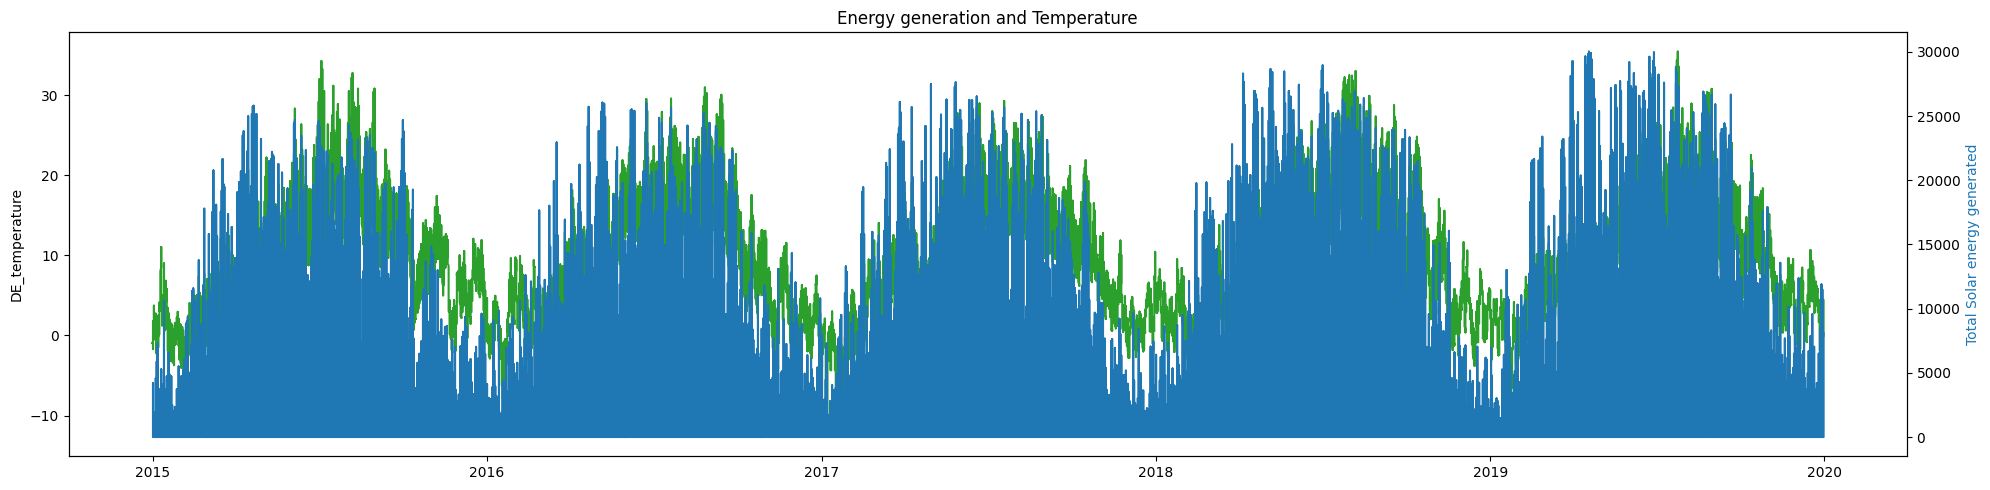

In [27]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day_y, weather_energy.DE_temperature, color = 'tab:green')
ax1.set_ylabel('DE_temperature')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day_y,weather_energy.DE_solar_generation_actual,color = 'tab:blue')
ax2.set_ylabel('Total Solar energy generated',color = 'tab:blue')
plt.title('Energy generation and Temperature')
fig.tight_layout()
plt.show()

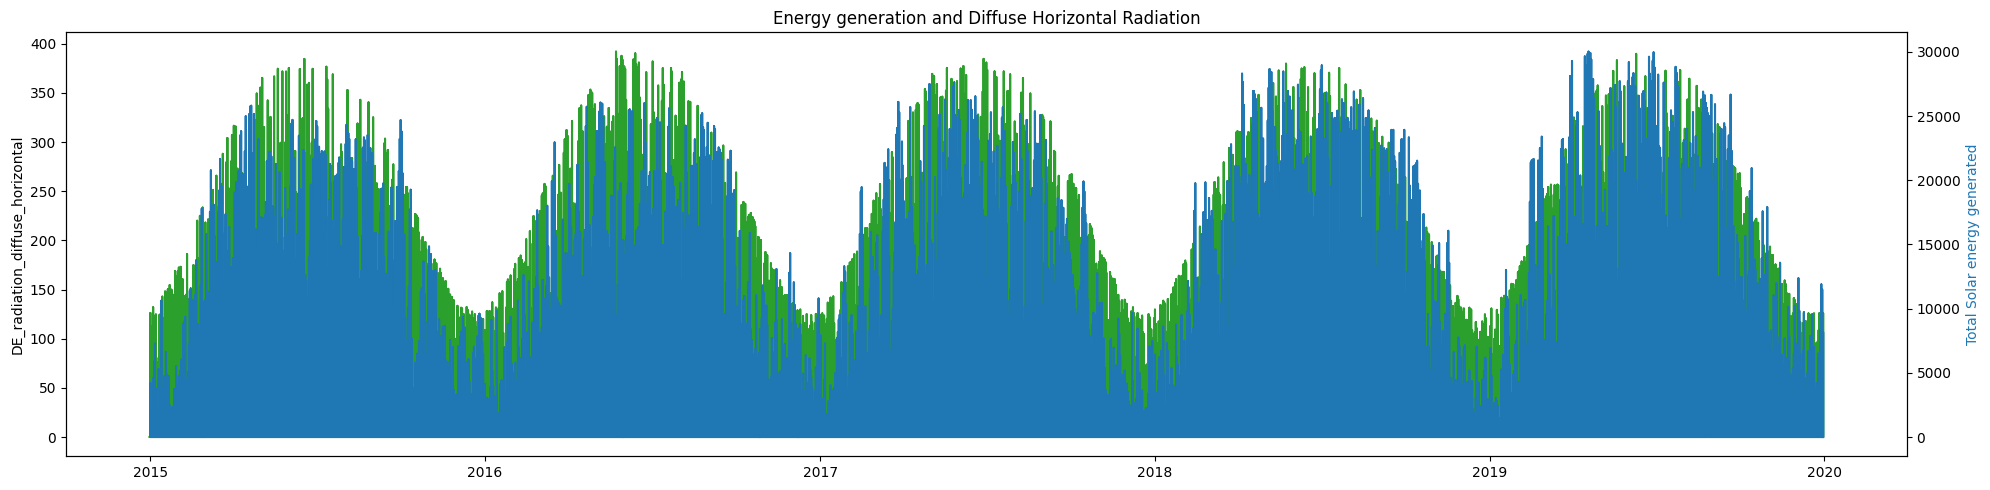

In [28]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day_y, weather_energy.DE_radiation_diffuse_horizontal, color = 'tab:green')
ax1.set_ylabel('DE_radiation_diffuse_horizontal')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day_y,weather_energy.DE_solar_generation_actual,color = 'tab:blue')
ax2.set_ylabel('Total Solar energy generated',color = 'tab:blue')
plt.title('Energy generation and Diffuse Horizontal Radiation')
fig.tight_layout()
plt.show()

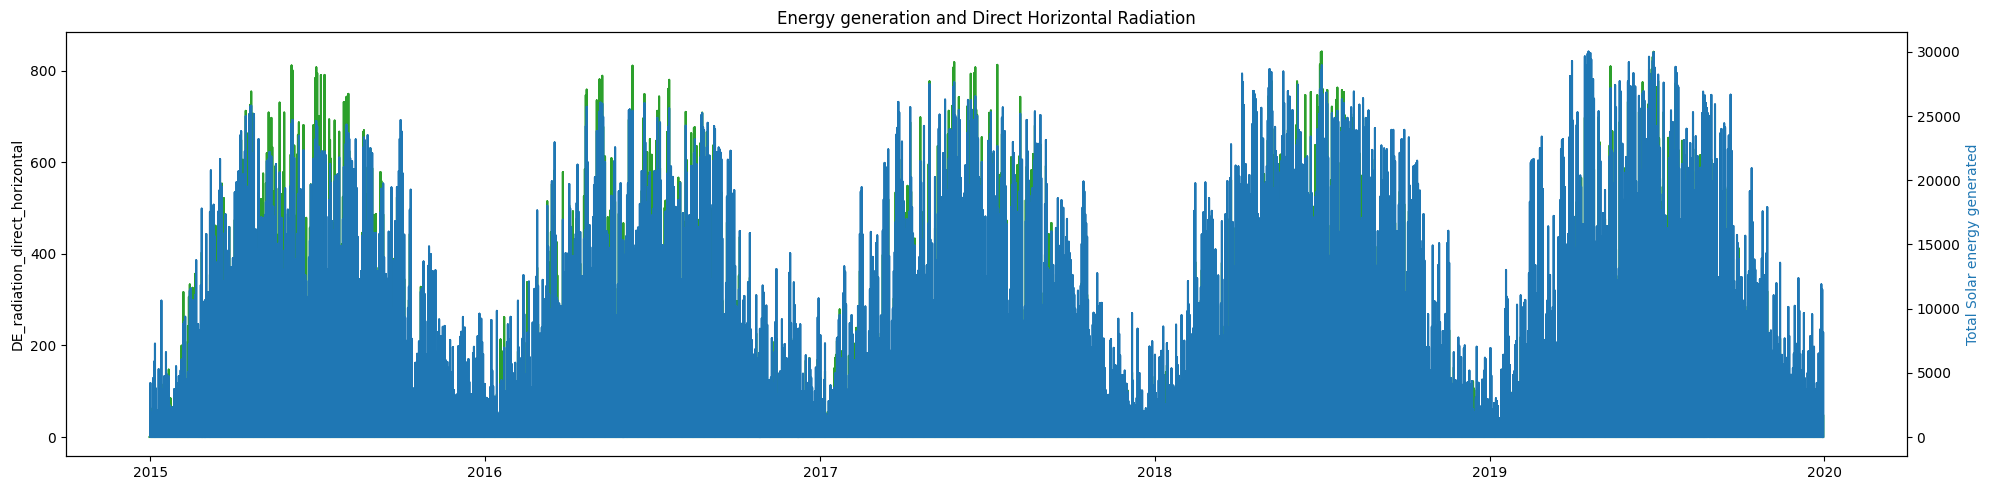

In [29]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day_y, weather_energy.DE_radiation_direct_horizontal, color = 'tab:green')
ax1.set_ylabel('DE_radiation_direct_horizontal')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day_y,weather_energy.DE_solar_generation_actual,color = 'tab:blue')
ax2.set_ylabel('Total Solar energy generated',color = 'tab:blue')
plt.title('Energy generation and Direct Horizontal Radiation')
fig.tight_layout()
plt.show()

In [30]:
df = weather_energy.drop(['utc_timestamp', 'cet_cest_timestamp', 'day_x','day_y'], axis=1)
df.corr()

DE_load_actual_entsoe_transparency  \
DE_load_actual_entsoe_transparency                                         1.000000   
DE_load_forecast_entsoe_transparency                                       0.978965   
DE_solar_capacity                                                          0.031524   
DE_solar_generation_actual                                                 0.325977   
DE_solar_profile                                                           0.325755   
DE_wind_capacity                                                           0.049085   
DE_wind_generation_actual                                                  0.096778   
DE_wind_profile                                                            0.087091   
DE_wind_offshore_capacity                                                  0.038555   
DE_wind_offshore_generation_actual                                         0.080809   
DE_wind_offshore_profile                                                   0.068237   
DE_wind_onshore_capacity                                                   0.051011   
DE_wind_onshore_generation_actual                                          0.093951   
DE_wind_onshore_profile                                                    0.084295   
DE_50hertz_load_actual_entsoe_transparency                                 0.901771   
DE_50hertz_load_forecast_entsoe_transparency                               0.847374   
DE_50hertz_solar_generation_actual                                         0.311300   
DE_50hertz_wind_generation_actual                                          0.074251   
DE_50hertz_wind_offshore_generation_actual                                 0.072519   
DE_50hertz_wind_onshore_generation_actual                                  0.071601   
DE_LU_load_actual_entsoe_transparency                                      0.999890   
DE_LU_load_forecast_entsoe_transparency                                    0.978409   
DE_LU_solar_generation_actual                                              0.275680   
DE_LU_wind_generation_actual                                               0.093387   
DE_LU_wind_offshore_generation_actual                                      0.074282   
DE_LU_wind_onshore_generation_actual                                       0.091451   
DE_amprion_load_actual_entsoe_transparency                                 0.988265   
DE_amprion_load_forecast_entsoe_transparency                               0.976704   
DE_amprion_solar_generation_actual                                         0.322565   
DE_amprion_wind_onshore_generation_actual                                  0.092193   
DE_tennet_load_actual_entsoe_transparency                                  0.987432   
DE_tennet_load_forecast_entsoe_transparency                                0.916855   
DE_tennet_solar_generation_actual                                          0.323032   
DE_tennet_wind_generation_actual                                           0.103517   
DE_tennet_wind_offshore_generation_actual                                  0.076361   
DE_tennet_wind_onshore_generation_actual                                   0.104820   
DE_transnetbw_load_actual_entsoe_transparency                              0.970754   
DE_transnetbw_load_forecast_entsoe_transparency                            0.925897   
DE_transnetbw_solar_generation_actual                                      0.326044   
DE_transnetbw_wind_onshore_generation_actual                               0.048026   
DE_temperature                                                            -0.027191   
DE_radiation_direct_horizontal                                             0.255775   
DE_radiation_diffuse_horizontal                                            0.373641   

                                                 DE_load_forecast_entsoe_transparency  \
DE_load_actual_entsoe_transparency                                           0.978965   
DE_load_forecast_entsoe_transparency      

In [31]:
corrs = df.corr(method='pearson')
print(corrs['DE_solar_generation_actual'].sort_values(ascending=False).to_string())

DE_solar_generation_actual                         1.000000
DE_LU_solar_generation_actual                      1.000000
DE_tennet_solar_generation_actual                  0.994852
DE_solar_profile                                   0.993091
DE_amprion_solar_generation_actual                 0.985821
DE_50hertz_solar_generation_actual                 0.972609
DE_transnetbw_solar_generation_actual              0.968353
DE_radiation_direct_horizontal                     0.927822
DE_radiation_diffuse_horizontal                    0.750433
DE_temperature                                     0.559157
DE_load_forecast_entsoe_transparency               0.351265
DE_tennet_load_forecast_entsoe_transparency        0.350222
DE_amprion_load_forecast_entsoe_transparency       0.346664
DE_amprion_load_actual_entsoe_transparency         0.338742
DE_load_actual_entsoe_transparency                 0.325977
DE_50hertz_load_actual_entsoe_transparency         0.309113
DE_LU_load_forecast_entsoe_transparency 

In [32]:
corrs = df.corr(method='pearson')
print(corrs['DE_wind_generation_actual'].sort_values(ascending=False).to_string())

DE_wind_generation_actual                          1.000000
DE_LU_wind_generation_actual                       1.000000
DE_LU_wind_onshore_generation_actual               0.991724
DE_wind_onshore_generation_actual                  0.991569
DE_tennet_wind_onshore_generation_actual           0.977437
DE_tennet_wind_generation_actual                   0.963347
DE_wind_profile                                    0.954906
DE_wind_onshore_profile                            0.943583
DE_50hertz_wind_generation_actual                  0.927437
DE_50hertz_wind_onshore_generation_actual          0.923435
DE_amprion_wind_onshore_generation_actual          0.867689
DE_LU_wind_offshore_generation_actual              0.729034
DE_wind_offshore_generation_actual                 0.727908
DE_tennet_wind_offshore_generation_actual          0.705803
DE_transnetbw_wind_onshore_generation_actual       0.695505
DE_wind_offshore_profile                           0.669479
DE_50hertz_wind_offshore_generation_actu

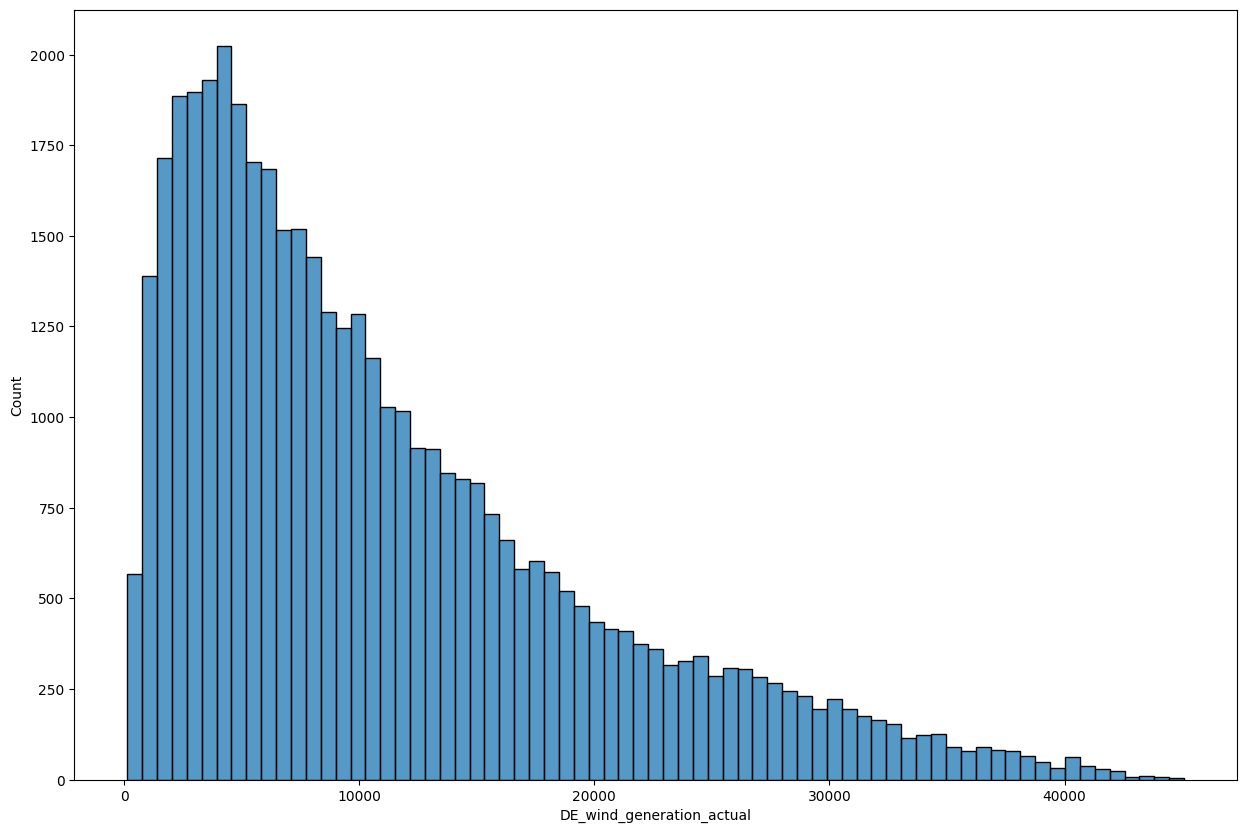

In [33]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.histplot(df,x='DE_wind_generation_actual');

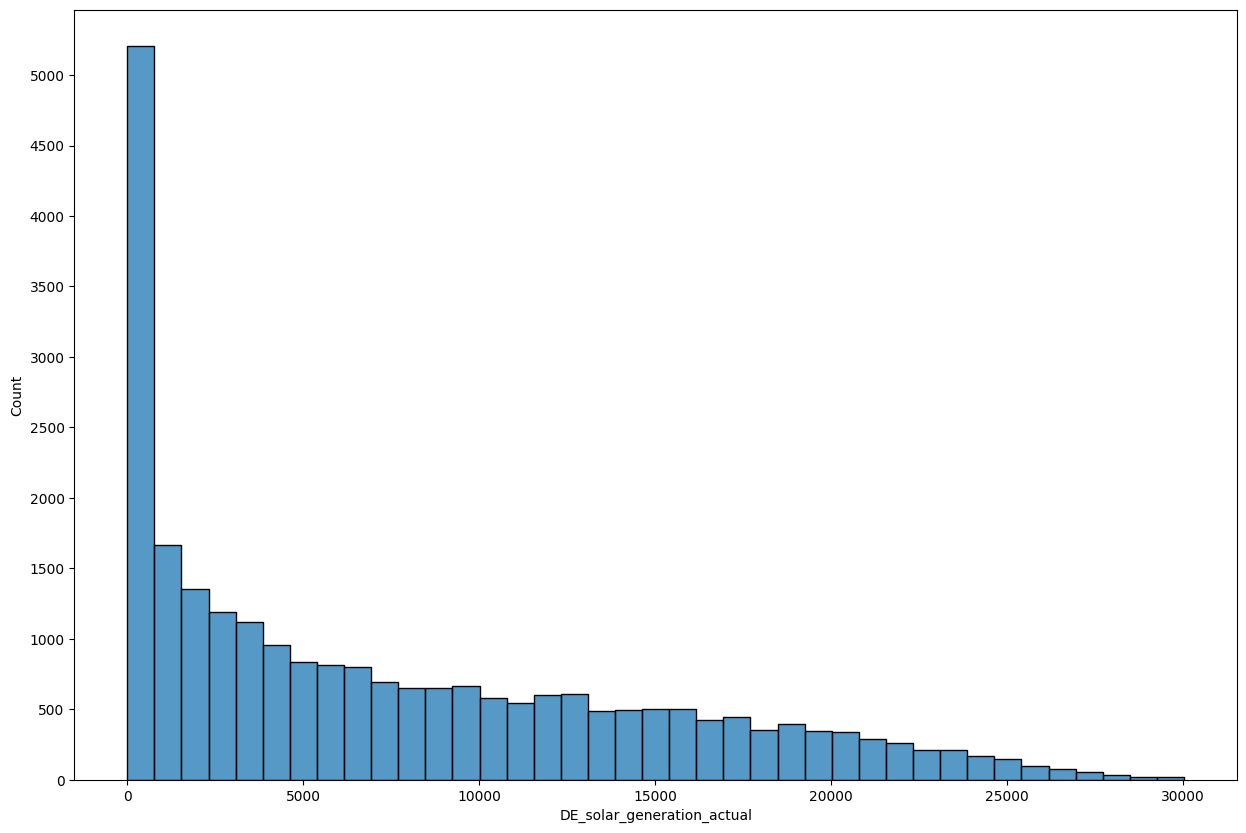

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to exclude 0 values in 'DE_solar_generation_actual'
filtered_data = df[df['DE_solar_generation_actual'] != 0]

plt.figure(figsize=(15, 10))
sns.histplot(data=filtered_data, x='DE_solar_generation_actual')

# Modify y-axis ticks to show differences of 500
new_ticks = np.arange(0, plt.gca().get_ylim()[1], 500)
plt.gca().set_yticks(new_ticks)

plt.show()


In [35]:
mean_val = weather_energy[cols].mean()

In [36]:
mean_val

DE_load_actual_entsoe_transparency                 55859.295044
DE_load_forecast_entsoe_transparency               54999.404018
DE_solar_capacity                                  42378.015114
DE_solar_generation_actual                          4304.566318
DE_solar_profile                                       0.101902
DE_wind_capacity                                   39972.606758
DE_wind_generation_actual                          11157.555246
DE_wind_profile                                        0.278908
DE_wind_offshore_capacity                           3261.024087
DE_wind_offshore_generation_actual                  1841.711817
DE_wind_offshore_profile                               0.570559
DE_wind_onshore_capacity                           36711.594726
DE_wind_onshore_generation_actual                   9315.527862
DE_wind_onshore_profile                                0.254253
DE_50hertz_load_actual_entsoe_transparency         10370.845336
DE_50hertz_load_forecast_entsoe_transpar

In [37]:
mean_val = weather_energy[cols].mean()
weather_energy[cols] = weather_energy[cols].fillna(mean_val)

In [38]:
weather_energy

utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
43820  2019-12-31T19:00:00Z  2019-12-31T20:00:00+0100   
43821  2019-12-31T20:00:00Z  2019-12-31T21:00:00+0100   
43822  2019-12-31T21:00:00Z  2019-12-31T22:00:00+0100   
43823  2019-12-31T22:00:00Z  2019-12-31T23:00:00+0100   
43824  2019-12-31T23:00:00Z  2020-01-01T00:00:00+0100   

       DE_load_actual_entsoe_transparency  \
0                            55859.295044   
1                            41151.000000   
2                            40135.000000   
3                            39106.000000   
4                            38765.000000   
...                                   ...   
43820                        47493.000000   
43821                        45842.000000   
43822                        45501.000000   
43823                        43969.000000   
43824                        42335.000000   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                              54999.404018       37248.000000   
1                              39723.000000       37248.000000   
2                              38813.000000       37248.000000   
3                              38490.000000       37248.000000   
4                              38644.000000       37248.000000   
...                                     ...                ...   
43820                          54131.000000       42378.015114   
43821                          51764.000000       42378.015114   
43822                          50569.000000       42378.015114   
43823                          47827.000000       42378.015114   
43824                          45472.000000       42378.015114   

       DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                     4304.566318          0.101902      27913.000000   
1                     4304.566318          0.101902      27913.000000   
2                     4304.566318          0.101902      27913.000000   
3                     4304.566318          0.101902      27913.000000   
4                     4304.566318          0.101902      27913.000000   
...                           ...               ...               ...   
43820                    0.000000          0.101902      39972.606758   
43821                    0.000000          0.101902      39972.606758   
43822                    0.000000          0.101902      39972.606758   
43823                    0.000000          0.101902      39972.606758   
43824                    0.000000          0.101902      39972.606758   

       DE_wind_generation_actual  DE_wind_profile  ...  \
0                   11157.555246         0.278908  ...   
1                    8852.000000         0.317100  ...   
2                    9054.000000         0.324400  ...   
3                    9070.000000         0.324900  ...   
4                    9163.000000         0.328300  ...   
...                          ...              ...  ...   
43820                8875.000000         0.278908  ...   
43821                7652.000000         0.278908  ...   
43822                7283.000000         0.278908  ...   
43823                6573.000000         0.278908  ...   
43824                6573.000000         0.278908  ...   

       DE_tennet_wind_onshore_generation_actual  \
0                                     3907.5761   
1                                     3398.0000   
2                                     3508.0000   
3                                     3724.0000   
4                                     3973.0000   
...                                         ...   
43820                                 1490.0000   
43821        

In [39]:
df_energy = weather_energy

In [40]:
df_energy.to_csv('data.csv')

In [41]:
df_energy = pd.read_csv('data.csv',parse_dates=[1], index_col=1)

In [42]:
df_energy = df_energy.drop(['Unnamed: 0','cet_cest_timestamp'], axis=1)

In [43]:
df_energy

DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                        55859.295044   
2015-01-01 00:00:00+00:00                        41151.000000   
2015-01-01 01:00:00+00:00                        40135.000000   
2015-01-01 02:00:00+00:00                        39106.000000   
2015-01-01 03:00:00+00:00                        38765.000000   
...                                                       ...   
2019-12-31 19:00:00+00:00                        47493.000000   
2019-12-31 20:00:00+00:00                        45842.000000   
2019-12-31 21:00:00+00:00                        45501.000000   
2019-12-31 22:00:00+00:00                        43969.000000   
2019-12-31 23:00:00+00:00                        42335.000000   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                          54999.404018   
2015-01-01 00:00:00+00:00                          39723.000000   
2015-01-01 01:00:00+00:00                          38813.000000   
2015-01-01 02:00:00+00:00                          38490.000000   
2015-01-01 03:00:00+00:00                          38644.000000   
...                                                         ...   
2019-12-31 19:00:00+00:00                          54131.000000   
2019-12-31 20:00:00+00:00                          51764.000000   
2019-12-31 21:00:00+00:00                          50569.000000   
2019-12-31 22:00:00+00:00                          47827.000000   
2019-12-31 23:00:00+00:00                          45472.000000   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 00:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 01:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 02:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 03:00:00+00:00       37248.000000                 4304.566318   
...                                      ...                         ...   
2019-12-31 19:00:00+00:00       42378.015114                    0.000000   
2019-12-31 20:00:00+00:00       42378.015114                    0.000000   
2019-12-31 21:00:00+00:00       42378.015114                    0.000000   
2019-12-31 22:00:00+00:00       42378.015114                    0.000000   
2019-12-31 23:00:00+00:00       42378.015114                    0.000000   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00          0.101902      27913.000000   
2015-01-01 00:00:00+00:00          0.101902      27913.000000   
2015-01-01 01:00:00+00:00          0.101902      27913.000000   
2015-01-01 02:00:00+00:00          0.101902      27913.000000   
2015-01-01 03:00:00+00:00          0.101902      27913.000000   
...                                     ...               ...   
2019-12-31 19:00:00+00:00          0.101902      39972.606758   
2019-12-31 20:00:00+00:00          0.101902      39972.606758   
2019-12-31 21:00:00+00:00          0.101902      39972.606758   
2019-12-31 22:00:00+00:00          0.101902      39972.606758   
2019-12-31 23:00:00+00:00          0.101902      39972.606758   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00               11157.555246         0.278908   
2015-01-01 00:00:00+00:00                8852.000000         0.317100   
2015-01-01 01:00:00+00:00                9054.000000         0.324400   
2015-01-01 02:00:00+00:00                9070.000000         0.324900   
2015-01-01 03:00:00+00:00           

In [44]:
mean_val = df_energy[cols].mean()
df_energy[cols] = df_energy[cols].fillna(mean_val)

In [45]:
df_energy

DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                        55859.295044   
2015-01-01 00:00:00+00:00                        41151.000000   
2015-01-01 01:00:00+00:00                        40135.000000   
2015-01-01 02:00:00+00:00                        39106.000000   
2015-01-01 03:00:00+00:00                        38765.000000   
...                                                       ...   
2019-12-31 19:00:00+00:00                        47493.000000   
2019-12-31 20:00:00+00:00                        45842.000000   
2019-12-31 21:00:00+00:00                        45501.000000   
2019-12-31 22:00:00+00:00                        43969.000000   
2019-12-31 23:00:00+00:00                        42335.000000   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                          54999.404018   
2015-01-01 00:00:00+00:00                          39723.000000   
2015-01-01 01:00:00+00:00                          38813.000000   
2015-01-01 02:00:00+00:00                          38490.000000   
2015-01-01 03:00:00+00:00                          38644.000000   
...                                                         ...   
2019-12-31 19:00:00+00:00                          54131.000000   
2019-12-31 20:00:00+00:00                          51764.000000   
2019-12-31 21:00:00+00:00                          50569.000000   
2019-12-31 22:00:00+00:00                          47827.000000   
2019-12-31 23:00:00+00:00                          45472.000000   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 00:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 01:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 02:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 03:00:00+00:00       37248.000000                 4304.566318   
...                                      ...                         ...   
2019-12-31 19:00:00+00:00       42378.015114                    0.000000   
2019-12-31 20:00:00+00:00       42378.015114                    0.000000   
2019-12-31 21:00:00+00:00       42378.015114                    0.000000   
2019-12-31 22:00:00+00:00       42378.015114                    0.000000   
2019-12-31 23:00:00+00:00       42378.015114                    0.000000   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00          0.101902      27913.000000   
2015-01-01 00:00:00+00:00          0.101902      27913.000000   
2015-01-01 01:00:00+00:00          0.101902      27913.000000   
2015-01-01 02:00:00+00:00          0.101902      27913.000000   
2015-01-01 03:00:00+00:00          0.101902      27913.000000   
...                                     ...               ...   
2019-12-31 19:00:00+00:00          0.101902      39972.606758   
2019-12-31 20:00:00+00:00          0.101902      39972.606758   
2019-12-31 21:00:00+00:00          0.101902      39972.606758   
2019-12-31 22:00:00+00:00          0.101902      39972.606758   
2019-12-31 23:00:00+00:00          0.101902      39972.606758   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00               11157.555246         0.278908   
2015-01-01 00:00:00+00:00                8852.000000         0.317100   
2015-01-01 01:00:00+00:00                9054.000000         0.324400   
2015-01-01 02:00:00+00:00                9070.000000         0.324900   
2015-01-01 03:00:00+00:00           

In [46]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series
    created by the user. The user can define either the 'df' and the 'column'
    or the 'series' and additionally, can also define the 'label', the
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

In [47]:
target

DE_solar_generation_actual  DE_wind_generation_actual
0                             NaN                        NaN
1                             NaN                     8852.0
2                             NaN                     9054.0
3                             NaN                     9070.0
4                             NaN                     9163.0
...                           ...                        ...
50396                         0.0                    10654.0
50397                         0.0                    11836.0
50398                         0.0                    12168.0
50399                         0.0                    12533.0
50400                         0.0                    12798.0

[50401 rows x 2 columns]

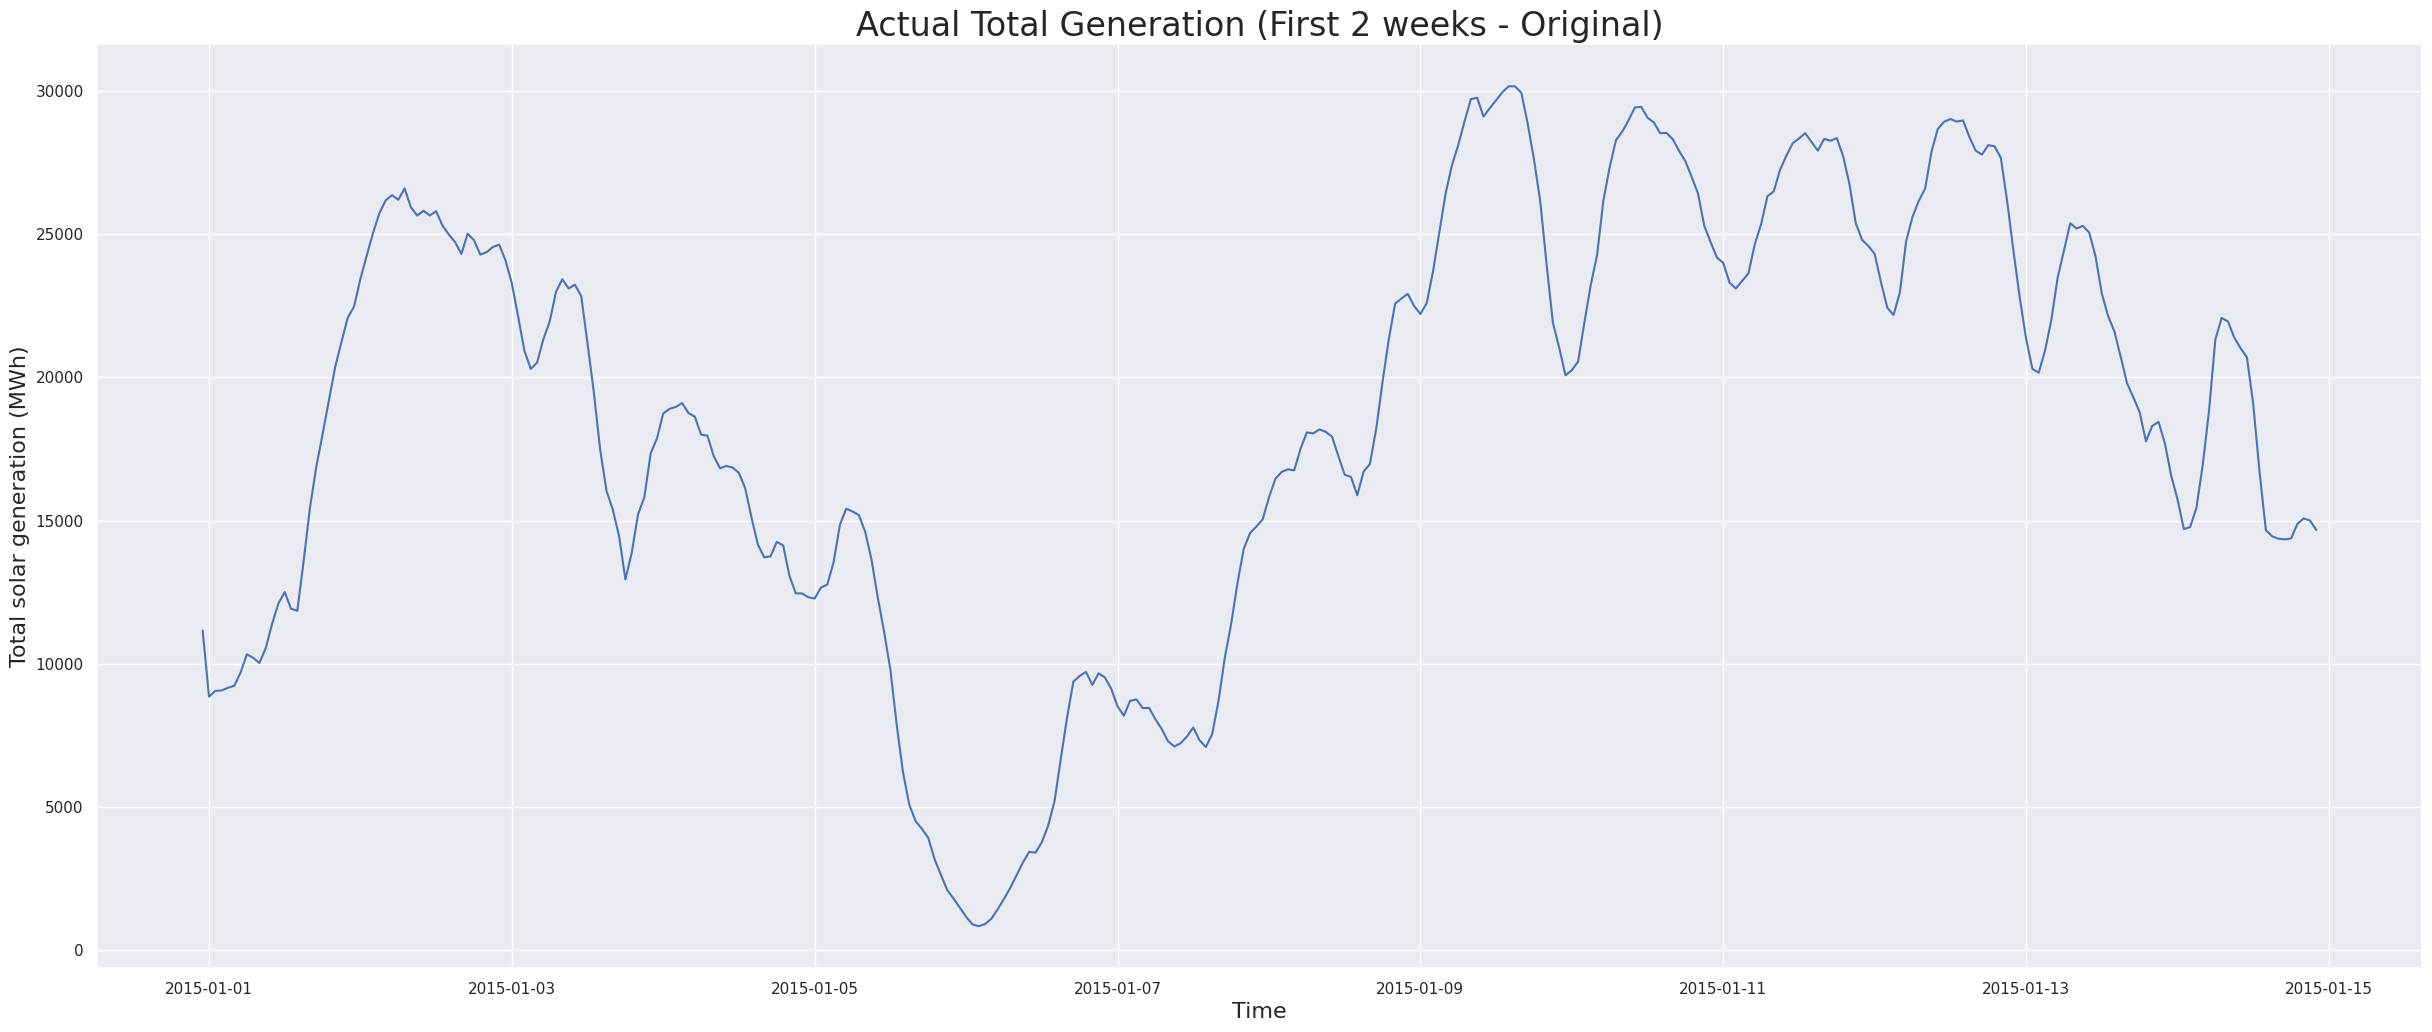

In [48]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=df_energy, column='DE_wind_generation_actual', ylabel='Total solar generation (MWh)',
                 title='Actual Total Generation (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [49]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df
df_energy = df_convert_dtypes(df_energy, np.int64, np.float64)

In [50]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43825 entries, 2014-12-31 23:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DE_load_actual_entsoe_transparency               43825 non-null  float64
 1   DE_load_forecast_entsoe_transparency             43825 non-null  float64
 2   DE_solar_capacity                                43825 non-null  float64
 3   DE_solar_generation_actual                       43825 non-null  float64
 4   DE_solar_profile                                 43825 non-null  float64
 5   DE_wind_capacity                                 43825 non-null  float64
 6   DE_wind_generation_actual                        43825 non-null  float64
 7   DE_wind_profile                                  43825 non-null  float64
 8   DE_wind_offshore_capacity                        43825 non-

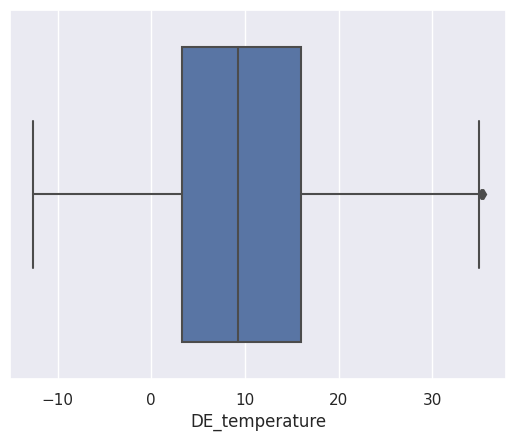

In [51]:
sns.boxplot(x=df_energy['DE_temperature'])
plt.show()

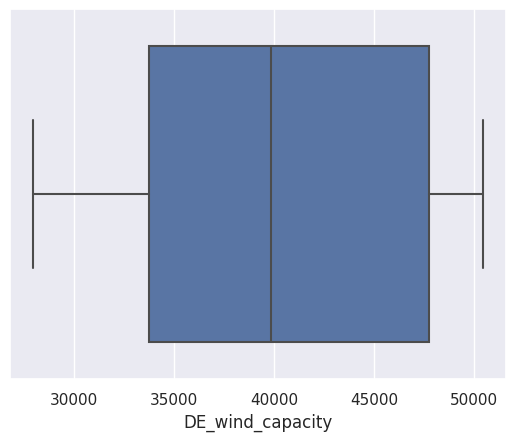

In [52]:
sns.boxplot(x=df_energy['DE_wind_capacity'])
plt.show()

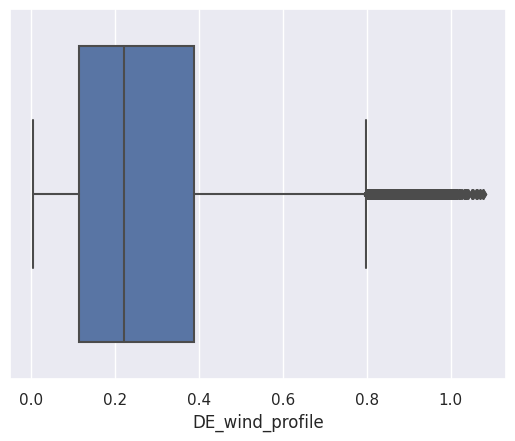

In [53]:
sns.boxplot(x=df_energy['DE_wind_profile'])
plt.show()

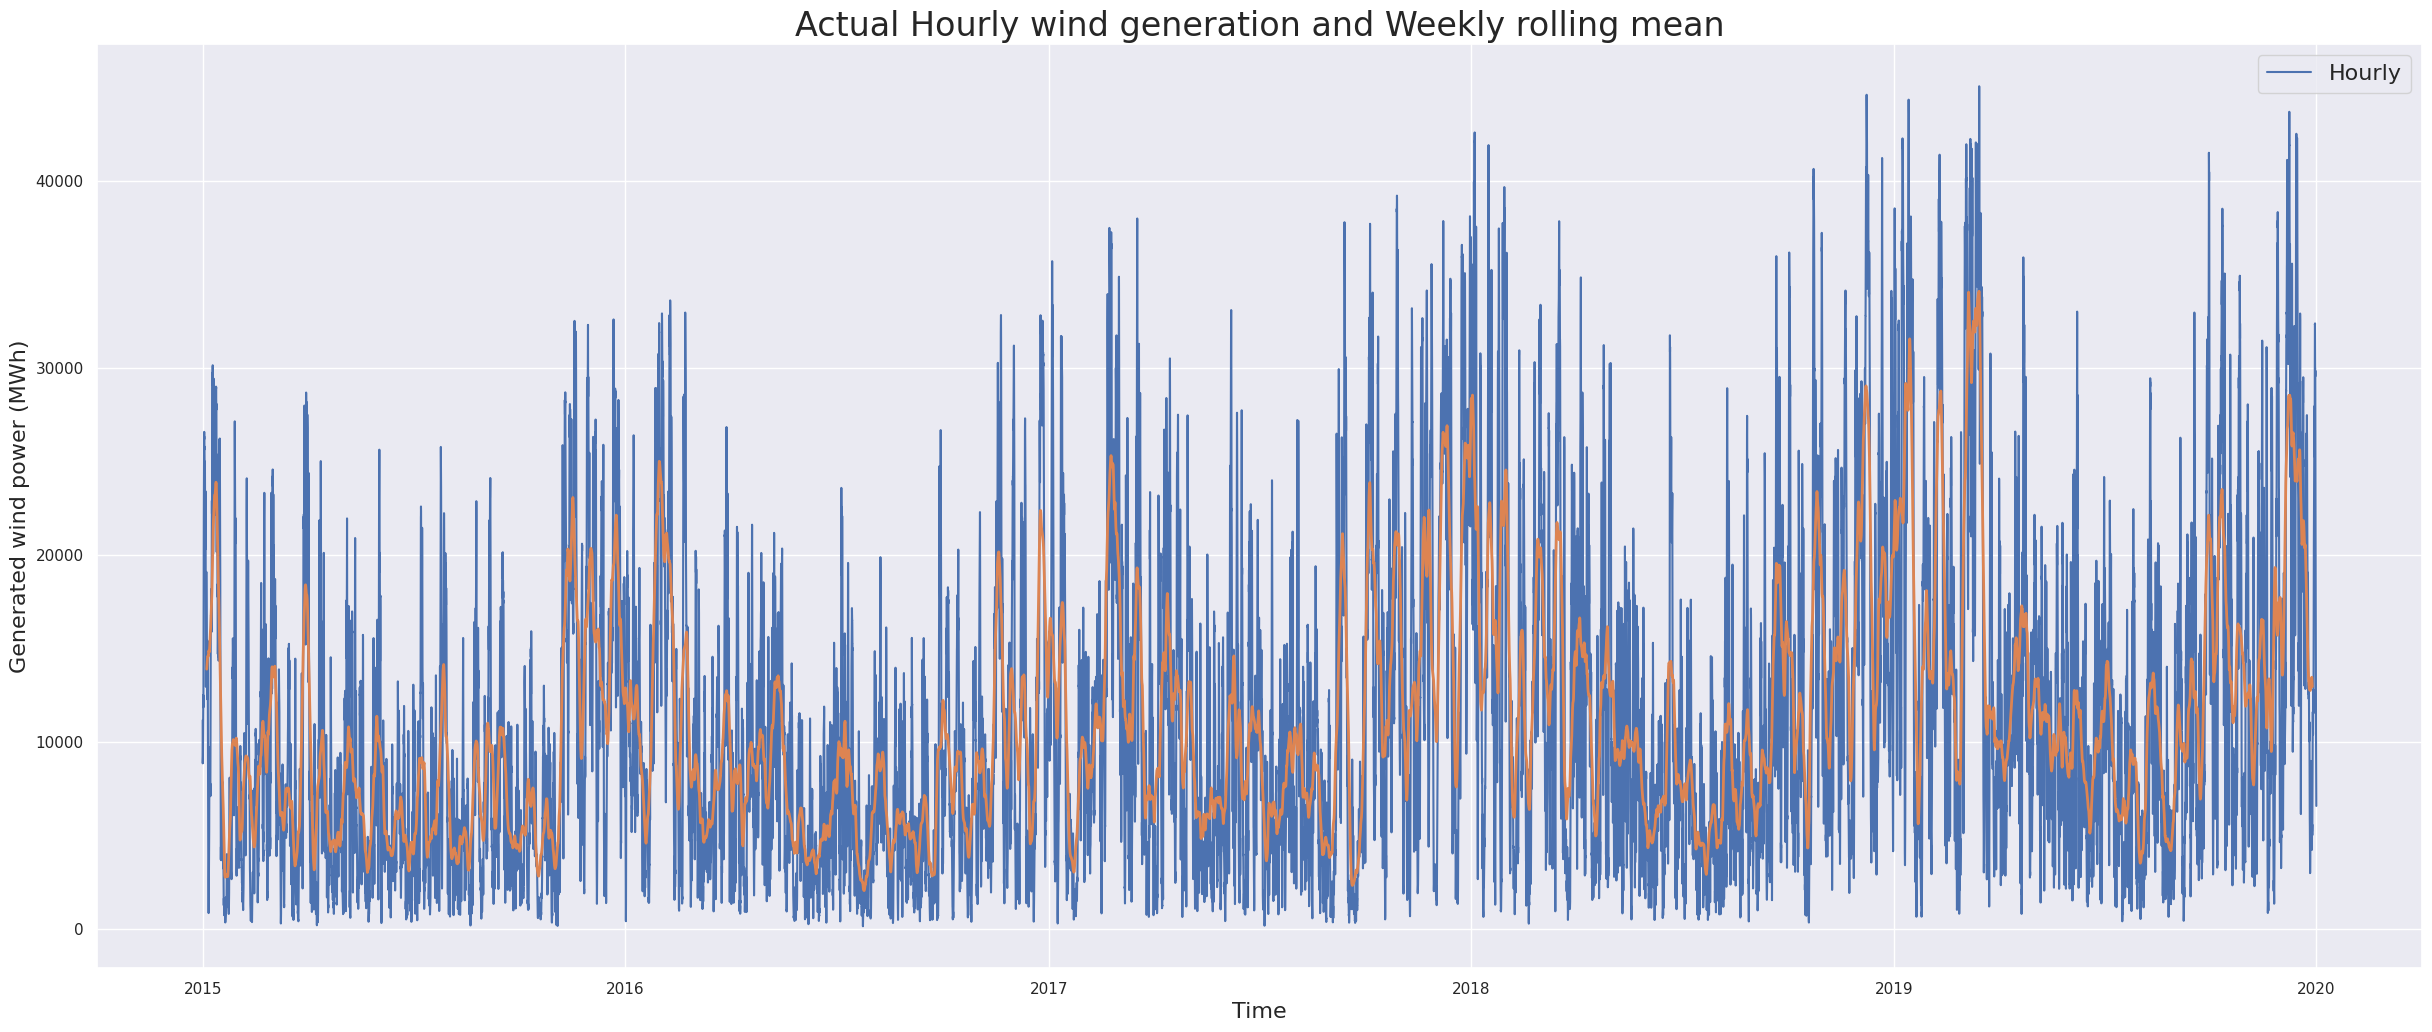

In [54]:
# Plot the hourly wind generation, along with the weekly rolling mean

rolling = df_energy['DE_wind_generation_actual'].rolling(24*7, center=True).mean()
ax = plot_series(df_energy, 'DE_wind_generation_actual', label='Hourly',  ylabel='Generated wind power (MWh)',
                 title='Actual Hourly wind generation and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

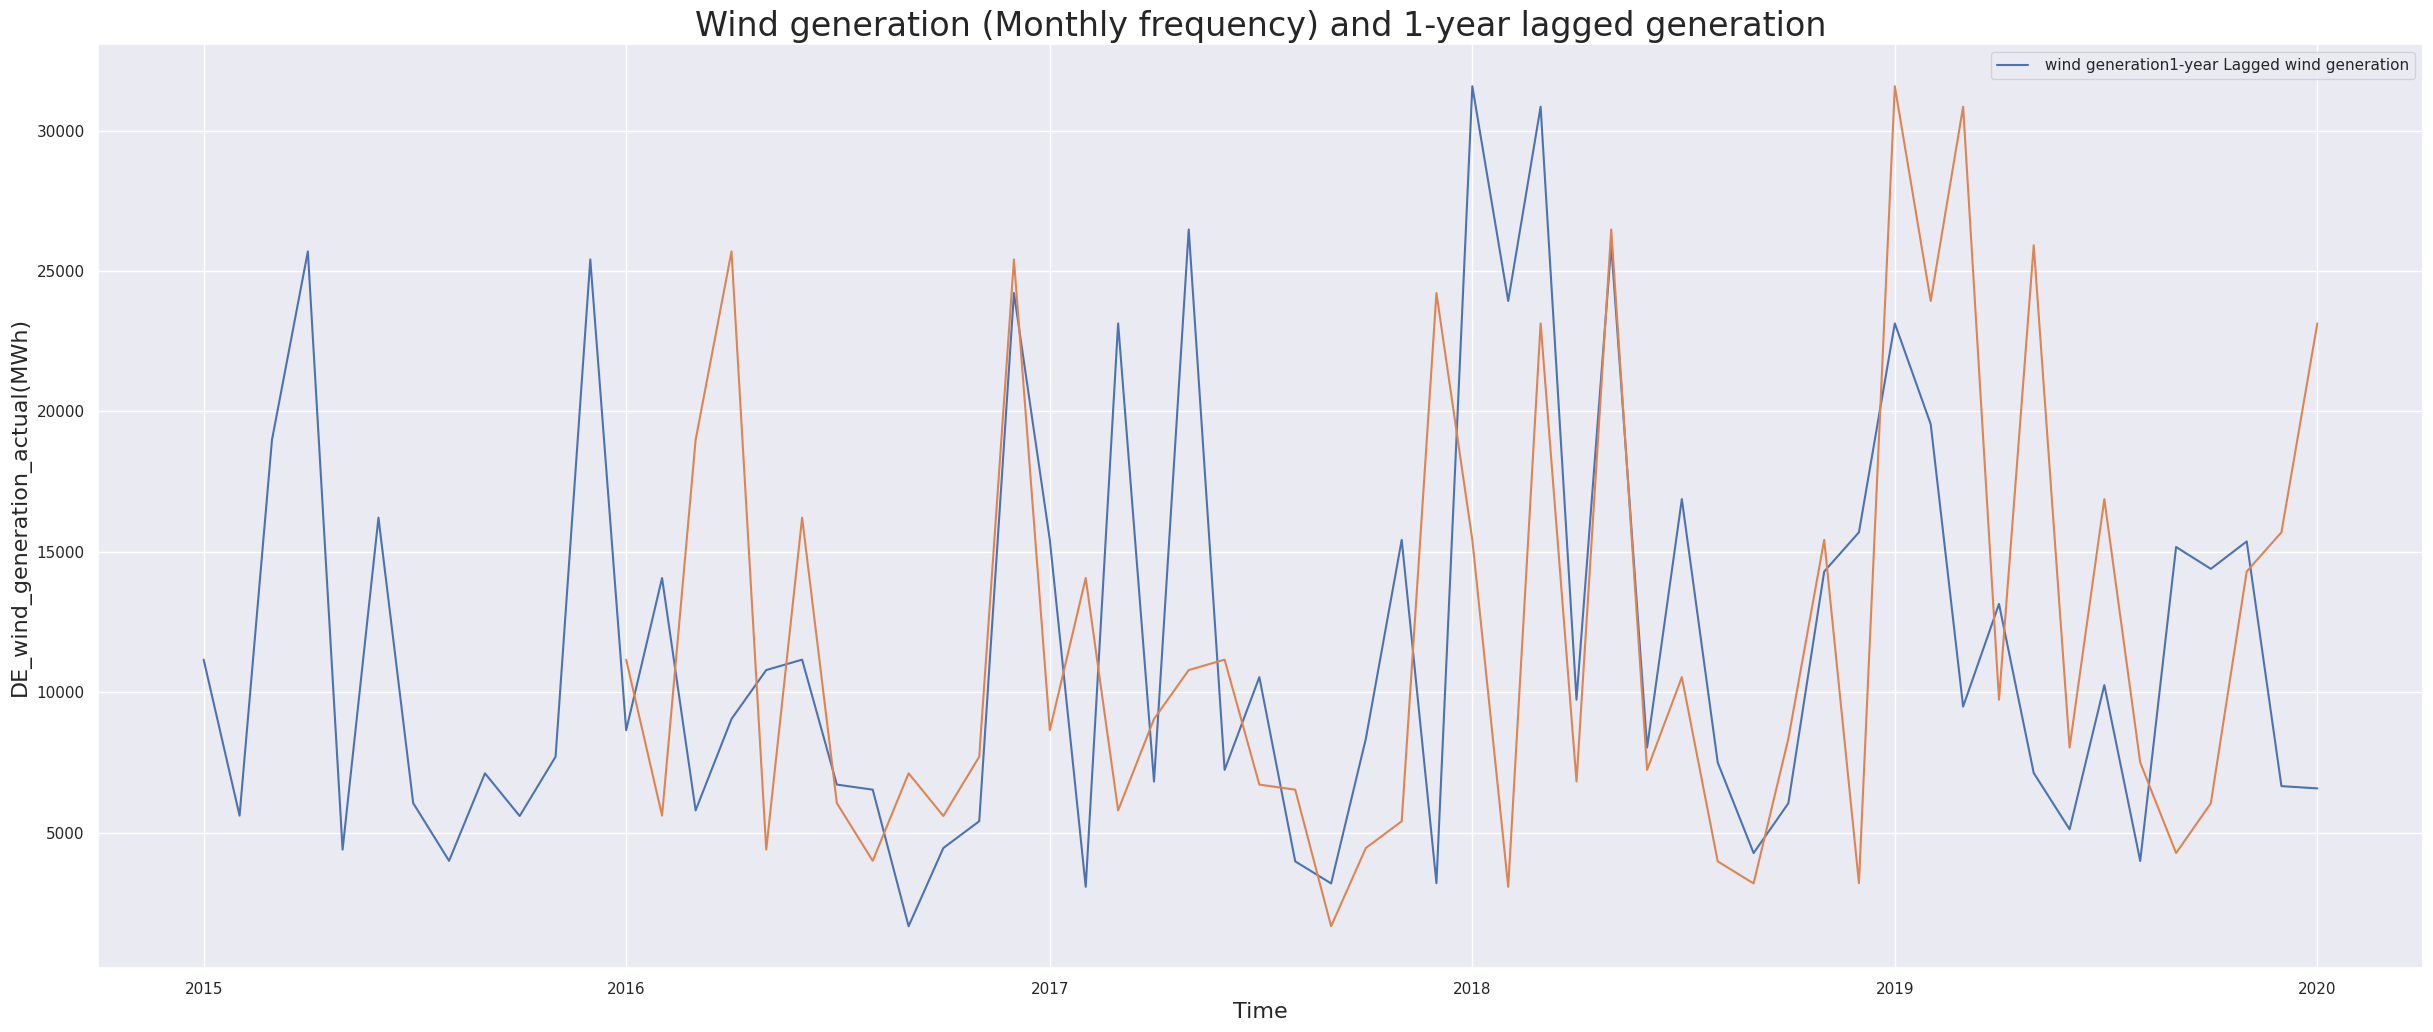

In [55]:
# Plot the wind generation(monthly frequence) along with its 1-year lagged series

monthly_price = df_energy['DE_wind_generation_actual'].asfreq('M')
ax = plot_series(series=monthly_price, ylabel='DE_wind_generation_actual(MWh)',
                 title='Wind generation (Monthly frequency) and 1-year lagged generation')
shifted = df_energy['DE_wind_generation_actual'].asfreq('M').shift(12)
ax.plot(shifted, label='Hourly')
ax.legend([' wind generation' '1-year Lagged wind generation'])
plt.show()

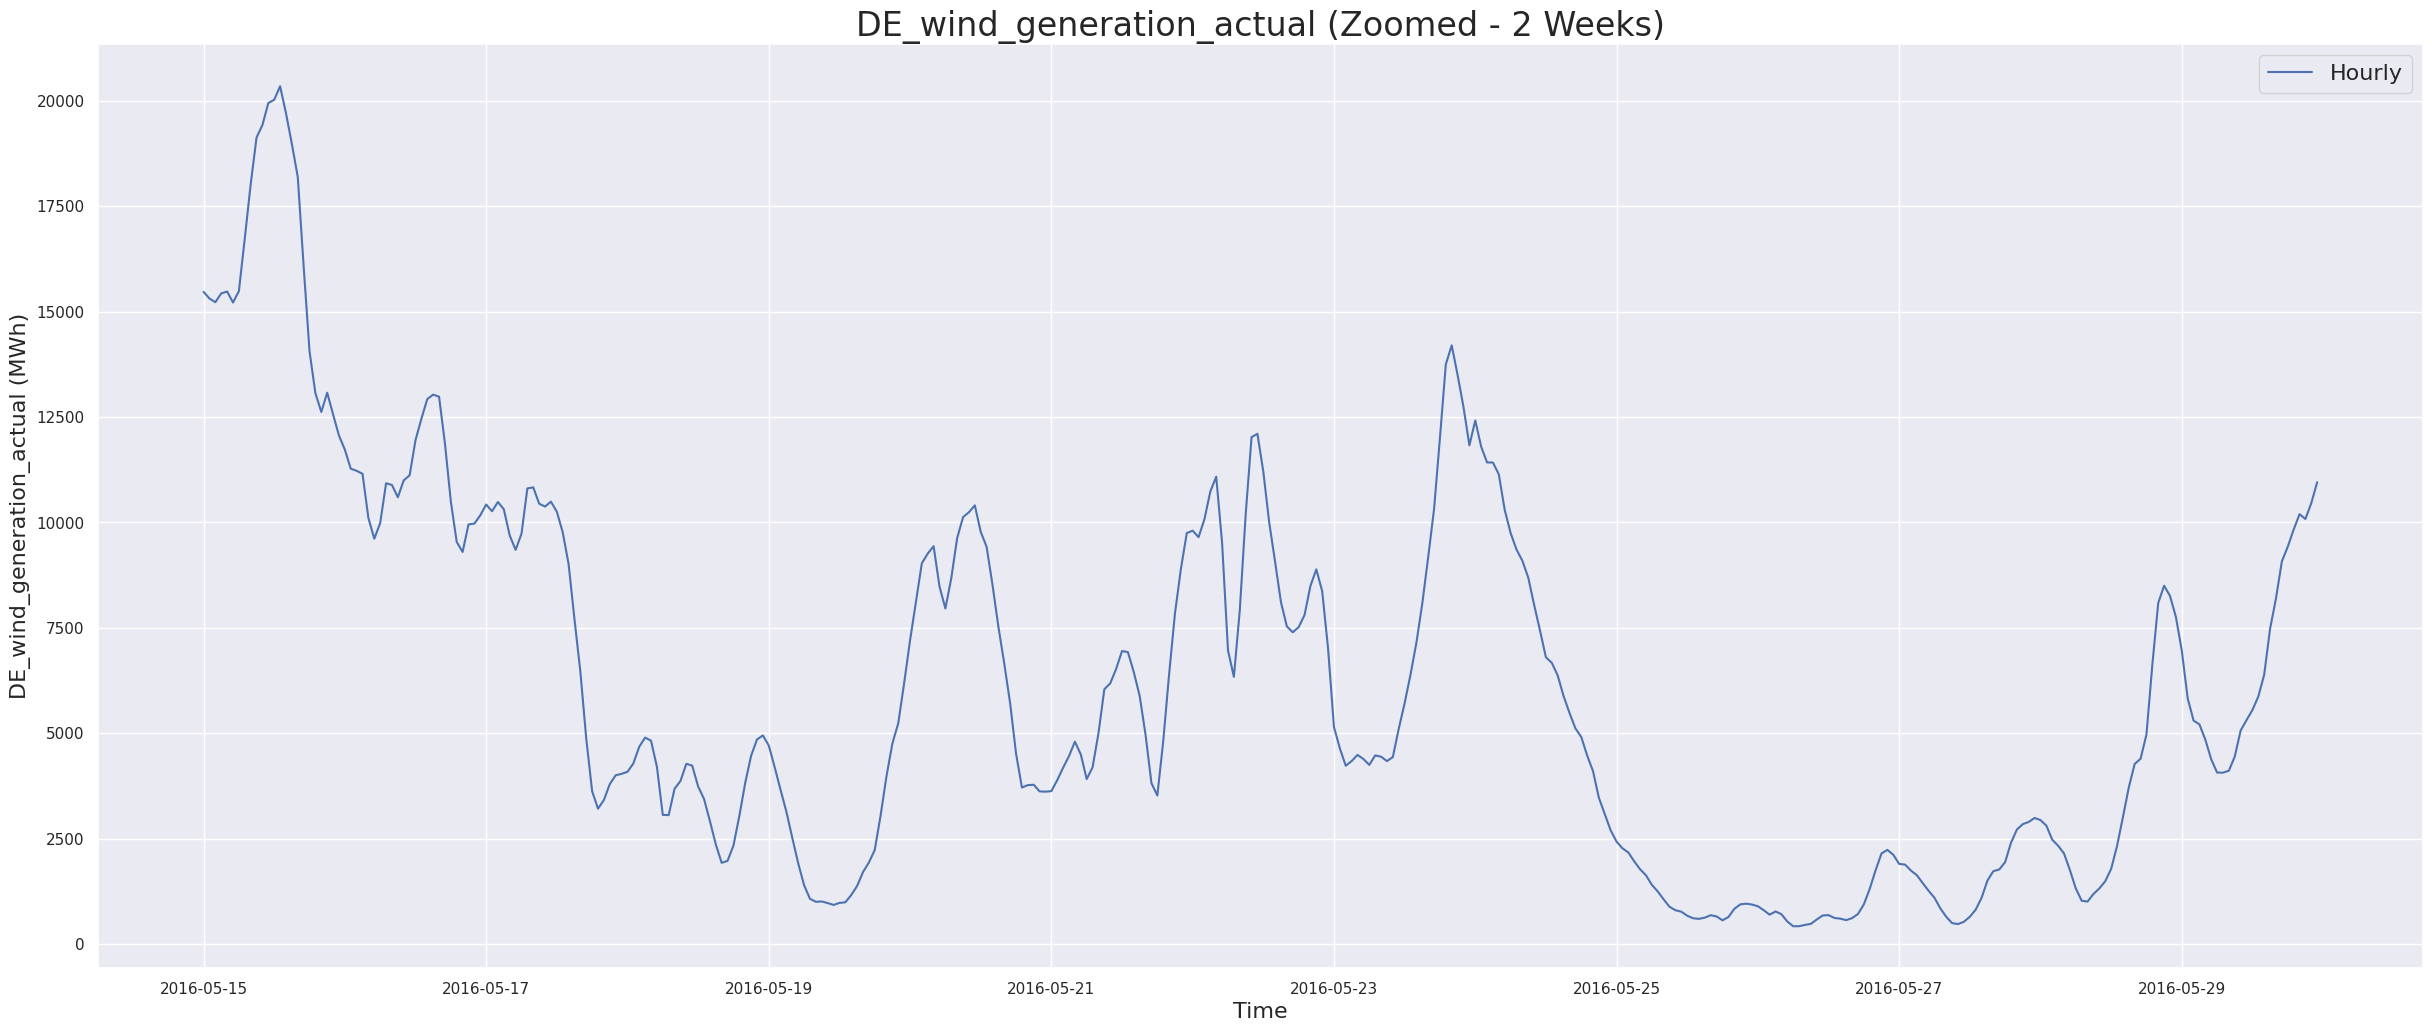

In [56]:
# Plot the actual wind gebneration at a daily/weekly scale

ax = plot_series(df_energy, 'DE_wind_generation_actual', label='Hourly', ylabel='DE_wind_generation_actual (MWh)',
                 start=1 + 24 * 500, end=1 + 24 * 515,
                 title='DE_wind_generation_actual (Zoomed - 2 Weeks)')
plt.show()

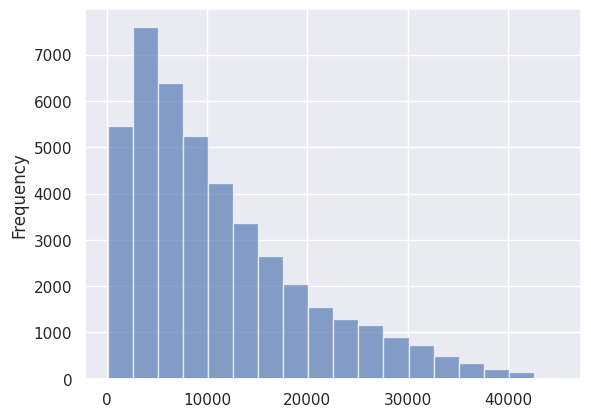

In [57]:
ax = df_energy['DE_wind_generation_actual'].plot.hist(bins=18, alpha=0.65)

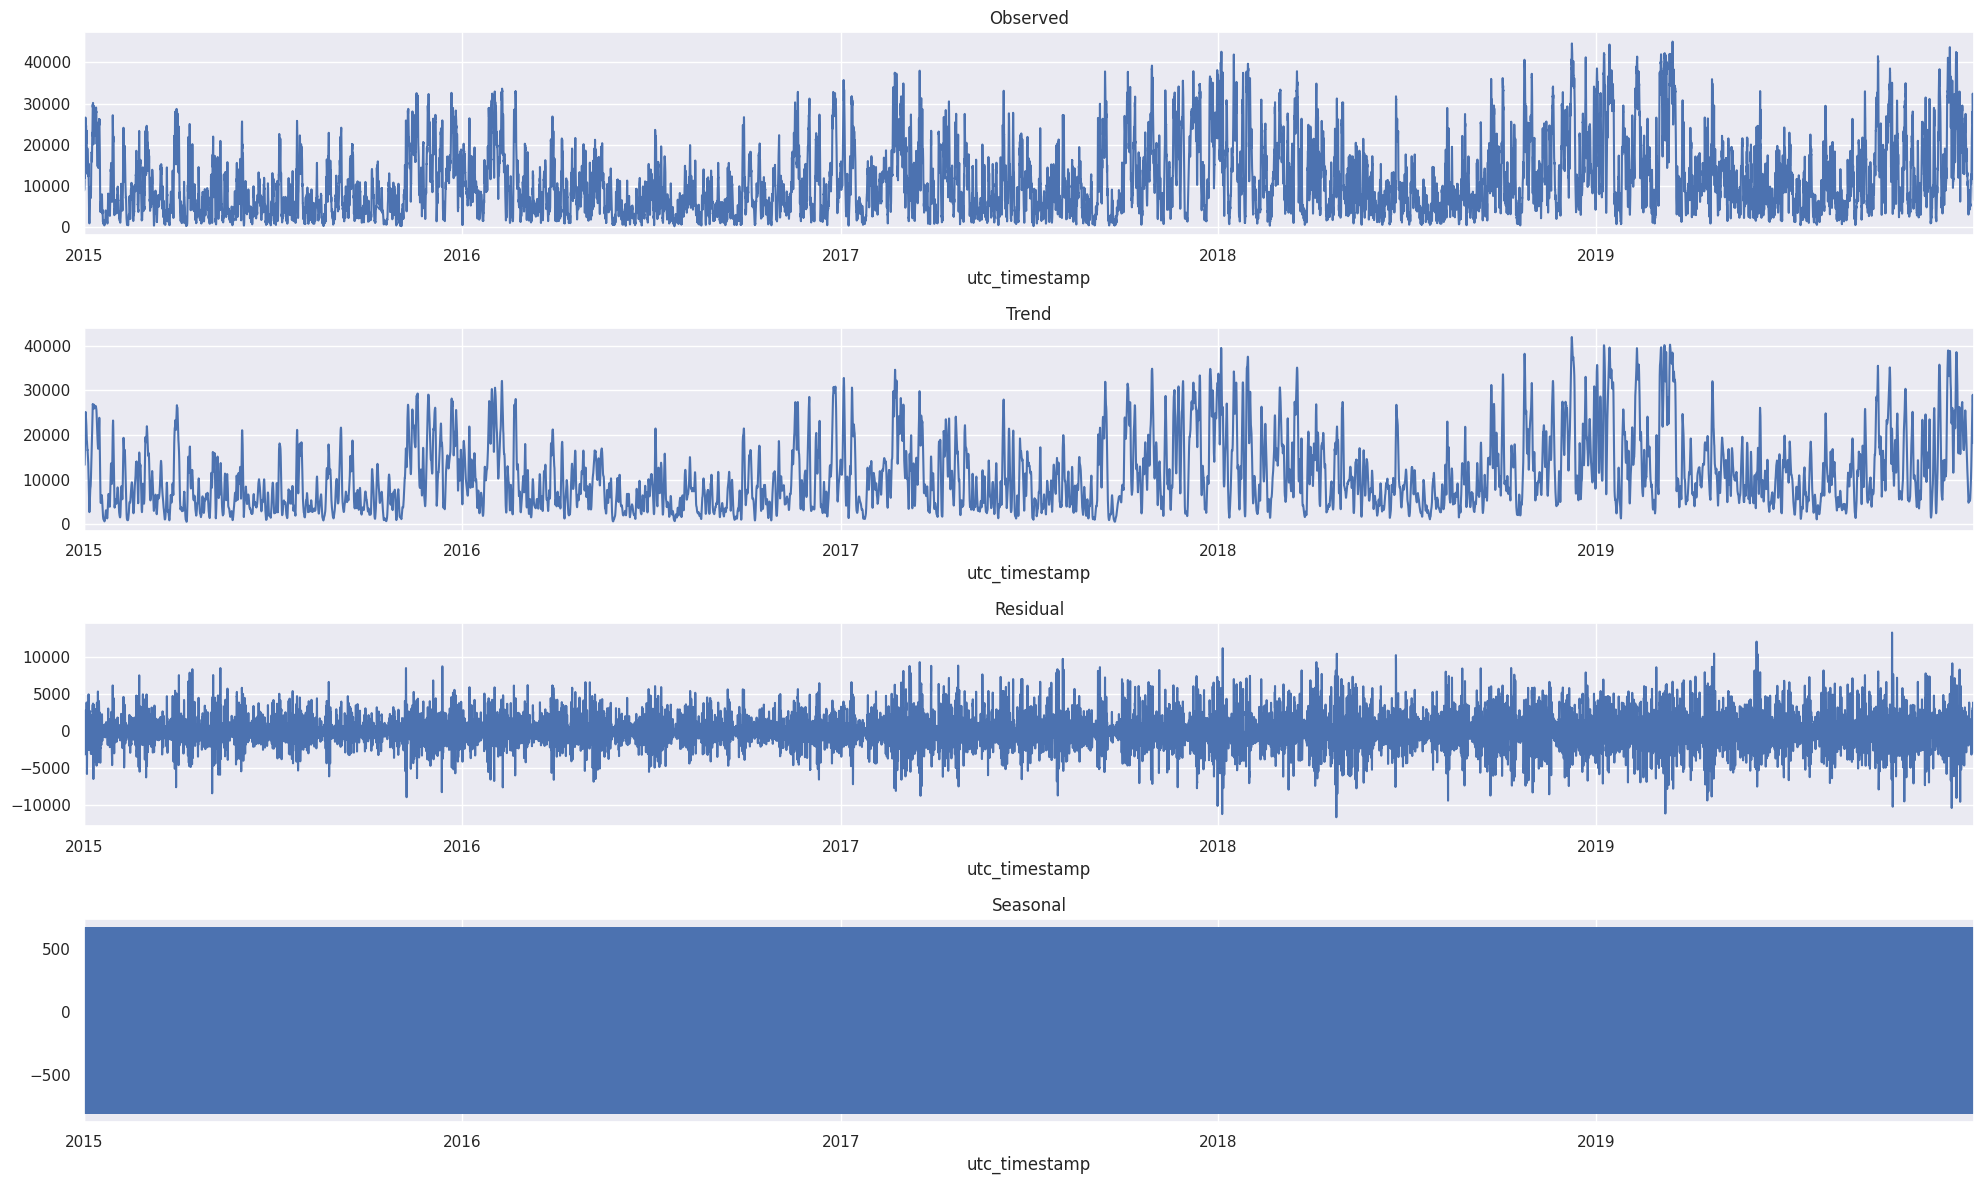

In [58]:
# Decompose the wind generation time series
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_energy['DE_wind_generation_actual'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

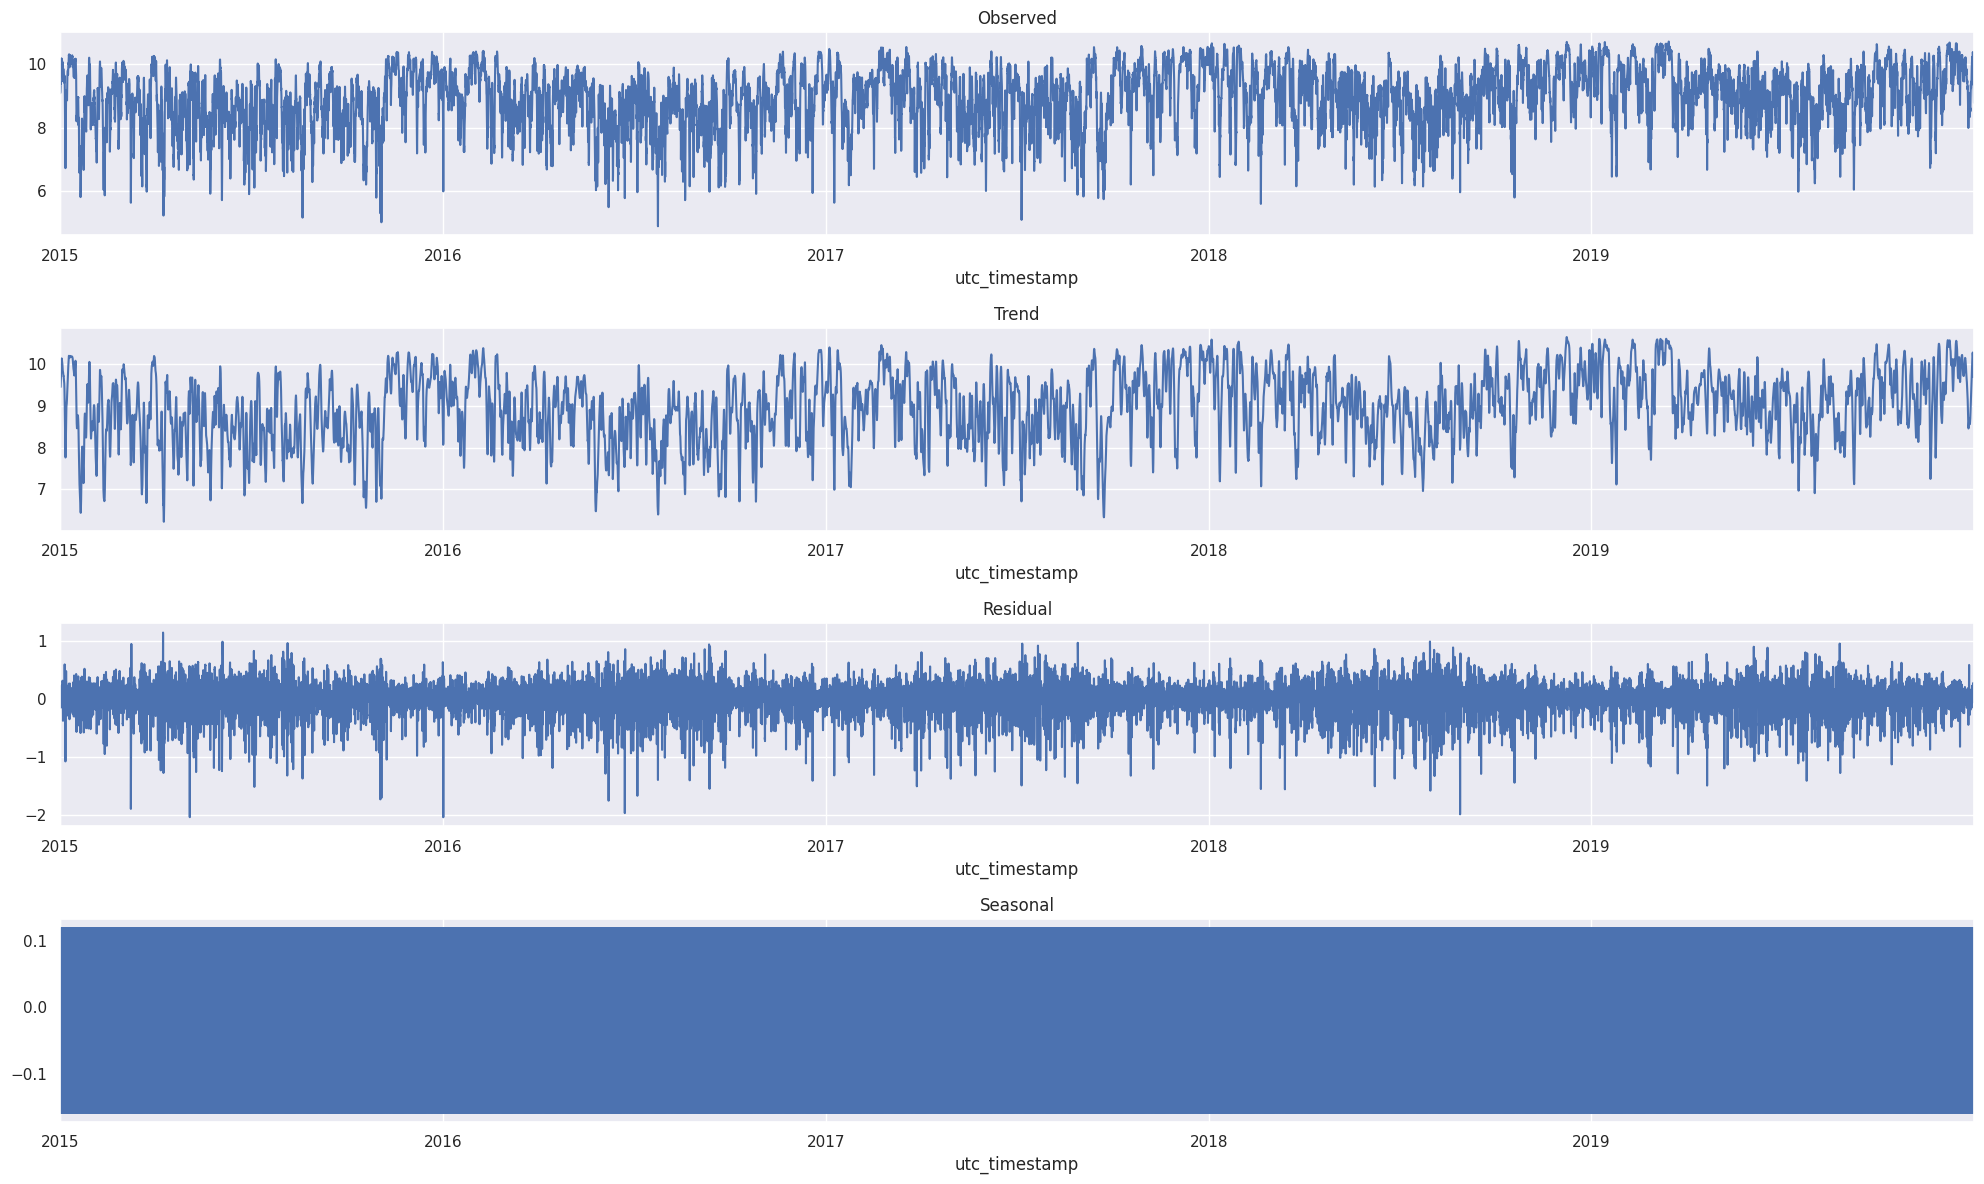

In [59]:
# Decompose the log wind generation time-series

res = sm.tsa.seasonal_decompose(np.log(df_energy['DE_wind_generation_actual']), model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt

y = df_energy['DE_wind_generation_actual']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -15.498194
p-value: 0.000000
#Lags used: 54
Critical Value (1%): -3.430499
Critical Value (5%): -2.861606
Critical Value (10%): -2.566805


In [61]:
kpss_test = kpss(y, regression='c')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

KPSS Statistic: 4.047681
p-value: 0.010000
#Lags used: 118
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


<ipython-input-61-511e56a7fdc2>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(y, regression='c')


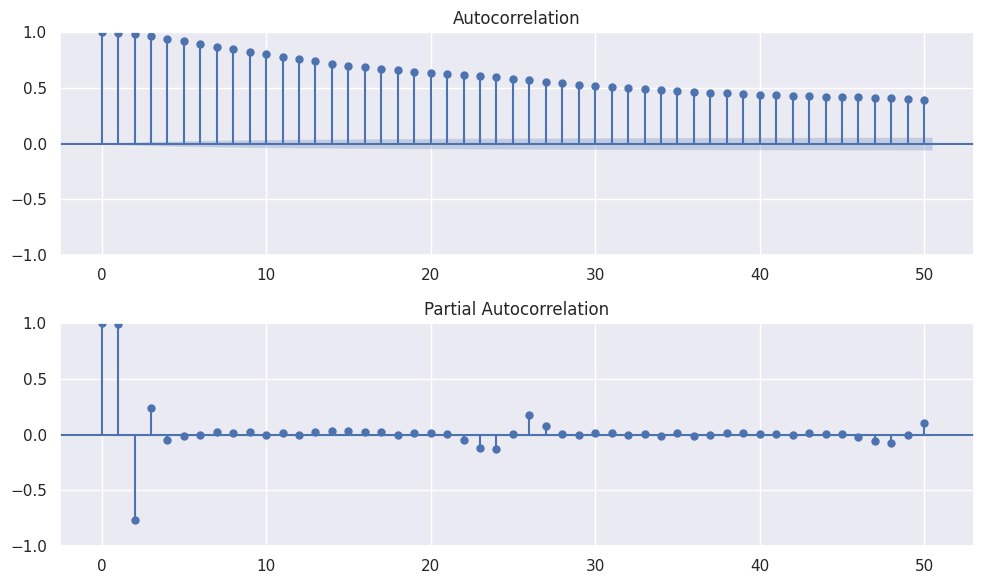

In [62]:
# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(df_energy['DE_wind_generation_actual'], lags=50, ax=ax1)
plot_pacf(df_energy['DE_wind_generation_actual'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

In [63]:
correlations = df_energy.corr(method='pearson')
print(correlations['DE_wind_generation_actual'].sort_values(ascending=False).to_string())

DE_wind_generation_actual                          1.000000
DE_wind_onshore_generation_actual                  0.991552
DE_tennet_wind_onshore_generation_actual           0.977105
DE_tennet_wind_generation_actual                   0.963010
DE_wind_profile                                    0.954467
DE_wind_onshore_profile                            0.943133
DE_50hertz_wind_generation_actual                  0.926767
DE_50hertz_wind_onshore_generation_actual          0.922730
DE_amprion_wind_onshore_generation_actual          0.867480
DE_wind_offshore_generation_actual                 0.727908
DE_tennet_wind_offshore_generation_actual          0.705552
DE_transnetbw_wind_onshore_generation_actual       0.695221
DE_wind_offshore_profile                           0.669171
DE_LU_wind_generation_actual                       0.571325
DE_LU_wind_onshore_generation_actual               0.566596
DE_50hertz_wind_offshore_generation_actual         0.545070
DE_LU_wind_offshore_generation_actual   

In [64]:
correlations = df_energy.corr(method='pearson')
print(correlations['DE_solar_generation_actual'].sort_values(ascending=False).to_string())

DE_solar_generation_actual                         1.000000
DE_tennet_solar_generation_actual                  0.994481
DE_solar_profile                                   0.992993
DE_amprion_solar_generation_actual                 0.985318
DE_50hertz_solar_generation_actual                 0.972173
DE_transnetbw_solar_generation_actual              0.967730
DE_radiation_direct_horizontal                     0.927531
DE_radiation_diffuse_horizontal                    0.749345
DE_temperature                                     0.558657
DE_LU_solar_generation_actual                      0.520492
DE_load_forecast_entsoe_transparency               0.350745
DE_tennet_load_forecast_entsoe_transparency        0.349816
DE_amprion_load_forecast_entsoe_transparency       0.346231
DE_amprion_load_actual_entsoe_transparency         0.338351
DE_load_actual_entsoe_transparency                 0.325625
DE_50hertz_load_actual_entsoe_transparency         0.308881
DE_transnetbw_load_actual_entsoe_transpa

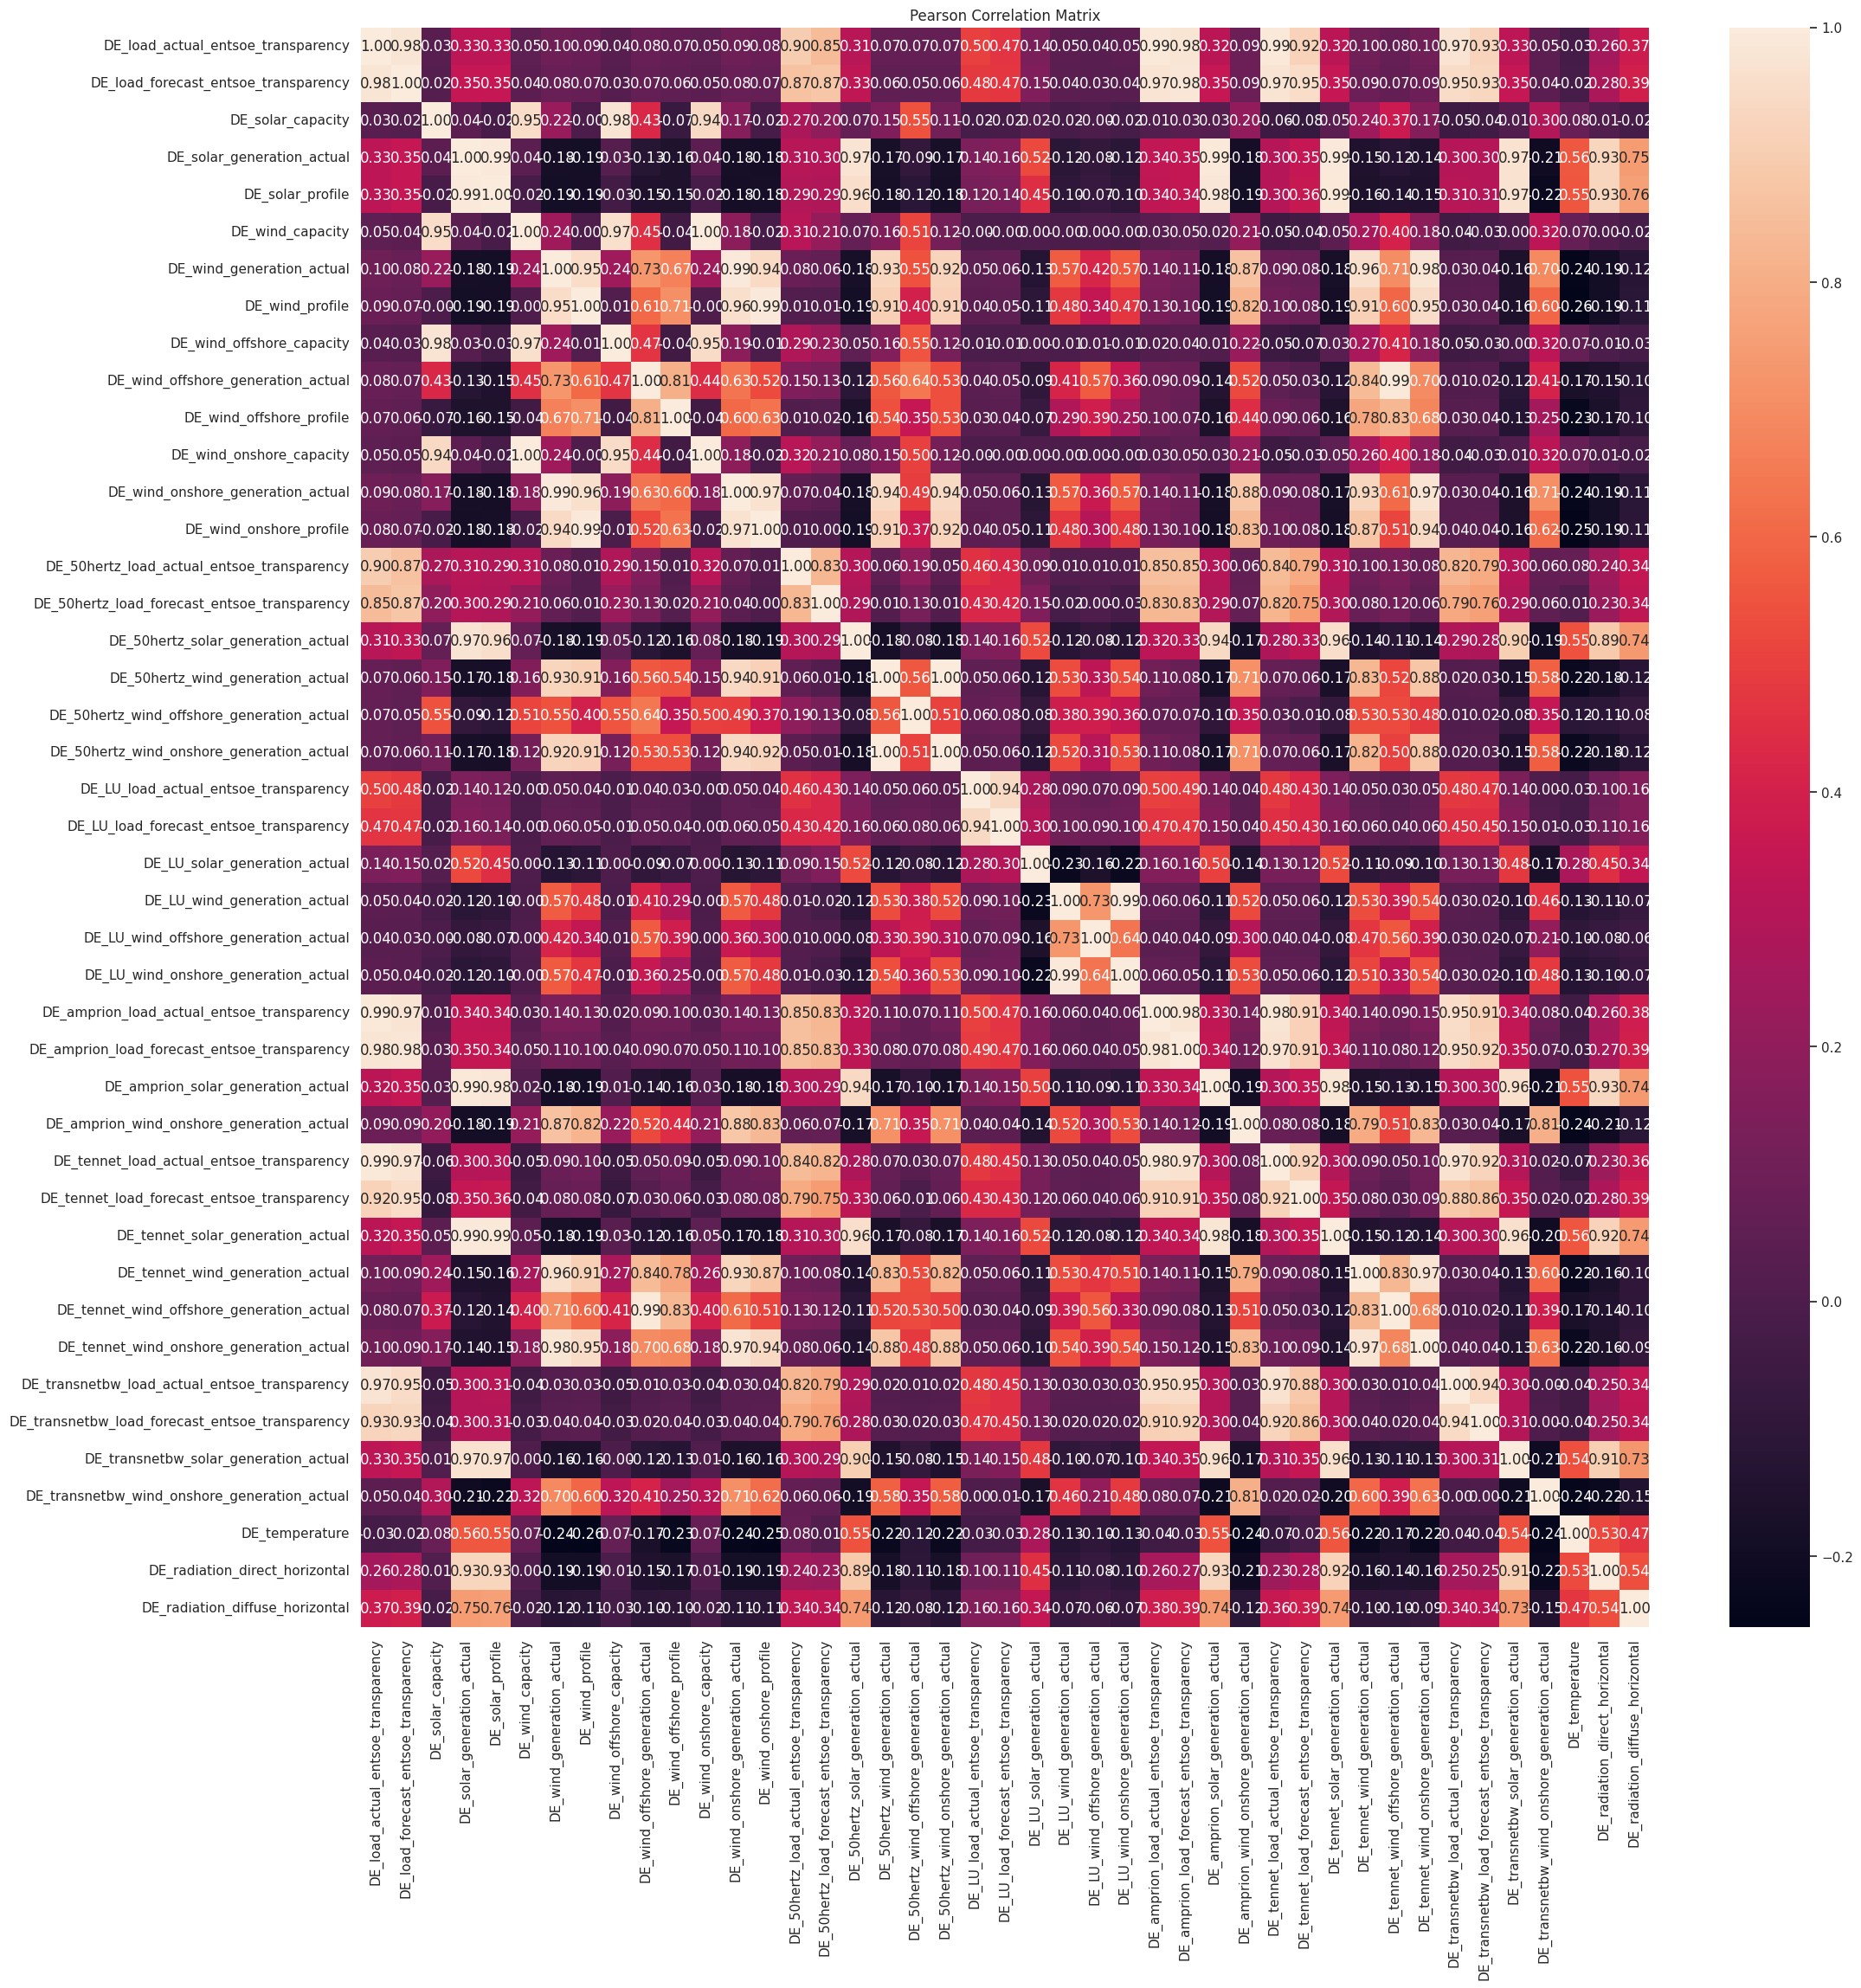

In [65]:

correlations = df_energy.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [66]:
highly_correlated = abs(correlations[correlations > 0.5])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

DE_load_actual_entsoe_transparency               DE_load_forecast_entsoe_transparency               0.978676
                                                 DE_50hertz_load_actual_entsoe_transparency         0.901771
                                                 DE_50hertz_load_forecast_entsoe_transparency       0.847374
                                                 DE_amprion_load_actual_entsoe_transparency         0.988265
                                                 DE_amprion_load_forecast_entsoe_transparency       0.976704
                                                 DE_tennet_load_actual_entsoe_transparency          0.987432
                                                 DE_tennet_load_forecast_entsoe_transparency        0.916855
                                                 DE_transnetbw_load_actual_entsoe_transparency      0.970754
                                                 DE_transnetbw_load_forecast_entsoe_transparency    0.925623
DE_load_forecast_en

In [67]:
#more analysis
# Generate 'hour', 'weekday' and 'month' features
df4 =df_energy
for i in range(len(df4)):
    position = df4.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df4.loc[position, 'hour'] = hour
    df4.loc[position, 'weekday'] = weekday
    df4.loc[position, 'month'] = month

In [68]:
df4

DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                        55859.295044   
2015-01-01 00:00:00+00:00                        41151.000000   
2015-01-01 01:00:00+00:00                        40135.000000   
2015-01-01 02:00:00+00:00                        39106.000000   
2015-01-01 03:00:00+00:00                        38765.000000   
...                                                       ...   
2019-12-31 19:00:00+00:00                        47493.000000   
2019-12-31 20:00:00+00:00                        45842.000000   
2019-12-31 21:00:00+00:00                        45501.000000   
2019-12-31 22:00:00+00:00                        43969.000000   
2019-12-31 23:00:00+00:00                        42335.000000   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                          54999.404018   
2015-01-01 00:00:00+00:00                          39723.000000   
2015-01-01 01:00:00+00:00                          38813.000000   
2015-01-01 02:00:00+00:00                          38490.000000   
2015-01-01 03:00:00+00:00                          38644.000000   
...                                                         ...   
2019-12-31 19:00:00+00:00                          54131.000000   
2019-12-31 20:00:00+00:00                          51764.000000   
2019-12-31 21:00:00+00:00                          50569.000000   
2019-12-31 22:00:00+00:00                          47827.000000   
2019-12-31 23:00:00+00:00                          45472.000000   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 00:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 01:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 02:00:00+00:00       37248.000000                 4304.566318   
2015-01-01 03:00:00+00:00       37248.000000                 4304.566318   
...                                      ...                         ...   
2019-12-31 19:00:00+00:00       42378.015114                    0.000000   
2019-12-31 20:00:00+00:00       42378.015114                    0.000000   
2019-12-31 21:00:00+00:00       42378.015114                    0.000000   
2019-12-31 22:00:00+00:00       42378.015114                    0.000000   
2019-12-31 23:00:00+00:00       42378.015114                    0.000000   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00          0.101902      27913.000000   
2015-01-01 00:00:00+00:00          0.101902      27913.000000   
2015-01-01 01:00:00+00:00          0.101902      27913.000000   
2015-01-01 02:00:00+00:00          0.101902      27913.000000   
2015-01-01 03:00:00+00:00          0.101902      27913.000000   
...                                     ...               ...   
2019-12-31 19:00:00+00:00          0.101902      39972.606758   
2019-12-31 20:00:00+00:00          0.101902      39972.606758   
2019-12-31 21:00:00+00:00          0.101902      39972.606758   
2019-12-31 22:00:00+00:00          0.101902      39972.606758   
2019-12-31 23:00:00+00:00          0.101902      39972.606758   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00               11157.555246         0.278908   
2015-01-01 00:00:00+00:00                8852.000000         0.317100   
2015-01-01 01:00:00+00:00                9054.000000         0.324400   
2015-01-01 02:00:00+00:00                9070.000000         0.324900   
2015-01-01 03:00:00+00:00           

In [69]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [70]:
cols = ['DE_solar_profile','DE_50hertz_solar_generation_actual','DE_LU_solar_generation_actual',
               'DE_amprion_solar_generation_actual','DE_tennet_solar_generation_actual',
              'DE_transnetbw_solar_generation_actual','DE_temperature','DE_radiation_direct_horizontal',
               'DE_radiation_diffuse_horizontal']

In [71]:
cols1 = ['DE_wind_profile','DE_wind_offshore_generation_actual', 'DE_wind_offshore_profile',
                 'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile', 'DE_50hertz_wind_generation_actual',
                 'DE_50hertz_wind_offshore_generation_actual','DE_50hertz_wind_onshore_generation_actual',
                 'DE_LU_wind_generation_actual','DE_amprion_wind_onshore_generation_actual','DE_tennet_wind_generation_actual',
                 'DE_tennet_wind_offshore_generation_actual', 'DE_tennet_wind_onshore_generation_actual',
                 'DE_transnetbw_wind_onshore_generation_actual',  ]

In [72]:
train = df_energy[:30677]
test = df_energy[30677:]


X_solar_train = train[cols]
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test[cols]
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train[cols1]
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test[cols1]
y_wind_test = test['DE_wind_generation_actual']

In [73]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import roc_curve, mean_absolute_error, mean_squared_error, accuracy_score


In [74]:
X_train, y_train = X_solar_train, y_solar_train
X_val,y_val = X_solar_test, y_solar_test
# Assigning model variables
model_lr=LinearRegression()
model_r=Ridge()

# Fitting models
model_r.fit(X_train,y_train);
model_lr.fit(X_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_val,y_val))
    print('=========')
model = [model_r,model_lr]
for m in model:
  check_metrics(m)

Ridge()
Training MAE: 53.36439539227781
-------------------------------------------------------------------
Validation MAE: 189.03539987576292
-------------------------------------------------------------------
Validation R2 score: 0.9977349994102329
LinearRegression()
Training MAE: 63.28930337049043
-------------------------------------------------------------------
Validation MAE: 2485.157764748497
-------------------------------------------------------------------
Validation R2 score: 0.7829587920586261


In [75]:
trains = model_lr.predict(X_val)

In [76]:
import math
trains = model_lr.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

3361.638154951592

In [77]:
import math
trains = model_r.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

343.4108600345051

In [78]:
# Assigning model variables
model_rfr = RandomForestRegressor()

# Fitting models
model_rfr.fit(X_train,y_train);
#model_xgbr.fit(X_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_val,y_val))
    print('===================================================================')
model = [model_rfr]
for m in model:
  check_metrics(m)

RandomForestRegressor()
Training MAE: 28.481596106118772
-------------------------------------------------------------------
Validation MAE: 459.1868173014418
-------------------------------------------------------------------
Validation R2 score: 0.9866170241447858


In [79]:
import math
trains = model_rfr.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

834.7495866697903

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
# Fitting models
model_gbr.fit(X_train,y_train);
#model_xgbr.fit(X_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_val,y_val))
    print('===================================================================')
model = [model_gbr]
for m in model:
  check_metrics(m)

GradientBoostingRegressor()
Training MAE: 91.27991895350732
-------------------------------------------------------------------
Validation MAE: 456.8409502587239
-------------------------------------------------------------------
Validation R2 score: 0.9884708473106614


In [81]:
import math
trains = model_gbr.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

774.7802845729266

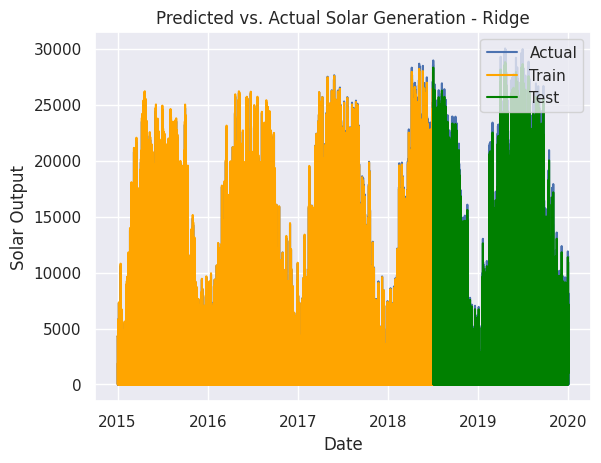

In [82]:
hgbr =Ridge().fit(X_solar_train, y_solar_train)
train_solar_pred = hgbr.predict(X_solar_train)
test_solar_pred = hgbr.predict(X_solar_test)

# thesis_dataset = thesis_dataset.reset_index()
df = df_energy[['DE_solar_generation_actual']]

train_df = train[['DE_solar_generation_actual']]
train_df.loc[:, 'DE_solar_generation_actual'] = train_solar_pred

test_df = test[['DE_solar_generation_actual']]
test_df.loc[:, 'DE_solar_generation_actual'] = test_solar_pred

# # Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual Solar Generation - Ridge")
plt.show()

In [83]:
# wind

In [84]:
# Assigning model variables

X_train, y_train = X_wind_train, y_wind_train
X_val,y_val = X_wind_test, y_wind_test
# Assigning model variables
model_lr=LinearRegression()
model_r=Ridge()

# Fitting models
model_r.fit(X_train,y_train);
model_lr.fit(X_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_val,y_val))
    print('=========')
model = [model_r,model_lr]
for m in model:
  check_metrics(m)

Ridge()
Training MAE: 3.0115766127734656
-------------------------------------------------------------------
Validation MAE: 3.934126652735725
-------------------------------------------------------------------
Validation R2 score: 0.9999997118802175
LinearRegression()
Training MAE: 14.719086165633756
-------------------------------------------------------------------
Validation MAE: 712.098258780356
-------------------------------------------------------------------
Validation R2 score: 0.9904390979438602


In [85]:
import math
trains = model_r.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

5.201229183259861

In [86]:
import math
trains = model_lr.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

947.4774578837404

In [87]:
# Assigning model variables
model_rfr = RandomForestRegressor()

# Fitting models
model_rfr.fit(X_train,y_train);
#model_xgbr.fit(X_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_val,y_val))
    print('===================================================================')
model = [model_rfr]
for m in model:
  check_metrics(m)

RandomForestRegressor()
Training MAE: 12.704735969272495
-------------------------------------------------------------------
Validation MAE: 253.81558683388235
-------------------------------------------------------------------
Validation R2 score: 0.9976113324253303


In [88]:
import math
trains = model_rfr.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

473.58431327793767

In [89]:
model_gbr = GradientBoostingRegressor()
# Fitting models
model_gbr.fit(X_train,y_train);
#model_xgbr.fit(X_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_val,y_val))
    print('===================================================================')
model = [model_gbr]
for m in model:
  check_metrics(m)

GradientBoostingRegressor()
Training MAE: 167.86484188236602
-------------------------------------------------------------------
Validation MAE: 405.45729463139514
-------------------------------------------------------------------
Validation R2 score: 0.9971166361767795


In [90]:
import math
trains = model_gbr.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse_true  = math.sqrt(mean_squared_error(y_val,trains))
rmse_true

520.318388051995

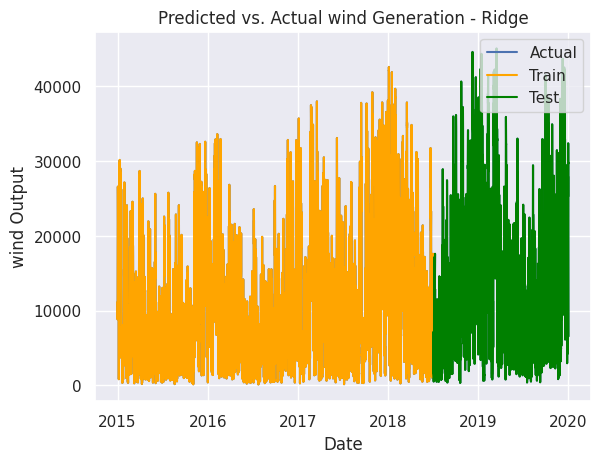

In [91]:


train_wind_pred = model_r.predict(X_wind_train)
test_wind_pred = model_r.predict(X_wind_test)

df = df_energy[['DE_wind_generation_actual']]

train_df = train[['DE_wind_generation_actual']]
train_df.loc[:, 'DE_wind_generation_actual'] = train_wind_pred

test_df = test[['DE_wind_generation_actual']]
test_df.loc[:, 'DE_wind_generation_actual'] = test_wind_pred

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('wind Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual wind Generation - Ridge")
plt.show()

In [92]:
X_solar_train = train.drop('DE_solar_generation_actual', axis=1)
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test.drop('DE_solar_generation_actual', axis=1)
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train.drop('DE_wind_generation_actual', axis=1)
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test.drop('DE_wind_generation_actual', axis=1)
y_wind_test = test['DE_wind_generation_actual']

In [93]:
class CustomRegressor:
    def __init__(self):
        self.solarRegressor = None
        self.windRegressor = None

    def fit(self, train_dataset):
        X_solar = train_dataset[cols]
        y_solar = train_dataset['DE_solar_generation_actual']
        self.solarRegressor =Ridge().fit(X_solar, y_solar)

        X_wind = train_dataset[cols1]
        y_wind = train_dataset['DE_wind_generation_actual']
        self.windRegressor = GradientBoostingRegressor().fit(X_wind, y_wind)
        return self

    def predict(self, prediction_dataset):
        return self.solarRegressor.predict(prediction_dataset[cols]) + self.windRegressor.predict(prediction_dataset[cols1])

In [94]:
cr = CustomRegressor().fit(train)

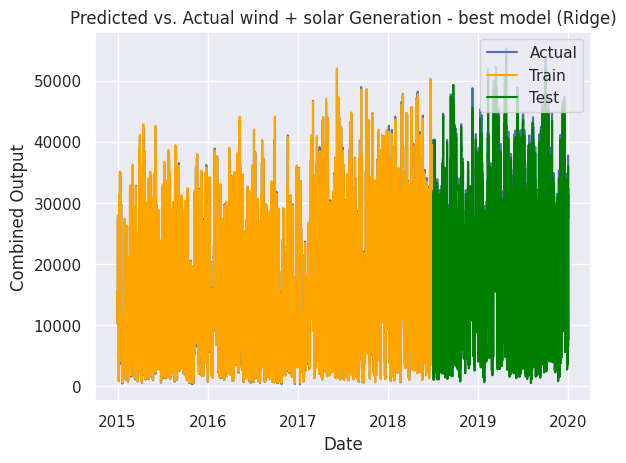

In [95]:

train_total_pred = cr.predict(train)
test_total_pred = cr.predict(test)

df = df_energy[['DE_solar_generation_actual']]
df['Total Generation'] = df_energy['DE_solar_generation_actual'] + df_energy['DE_wind_generation_actual']
df.drop(['DE_solar_generation_actual'], axis = 1, inplace = True)

train_df = train[['DE_solar_generation_actual']]
train_df['Total Generation'] = train_total_pred
train_df.drop(['DE_solar_generation_actual'], axis = 1, inplace = True)

test_df = test[['DE_solar_generation_actual']]
test_df['Total Generation'] = test_total_pred
test_df.drop(['DE_solar_generation_actual'], axis = 1, inplace = True)

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Combined Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual wind + solar Generation - best model (Ridge)")
plt.show()